# Project Overview

In this project, I will perform a data-driven analysis with data science, machine learning, and data visualization techniques to analyze and predict the price of listings on Boston's Airbnb dataset. Helping us understand more about what features influenced listing price.

# Project Goal

The goal for this project is to answer the following questions:

- 1. How to create Boston's Airbnb Price prediction model?
- 2. What features highly influence the price of Airbnb?

# 1. Data Gathering

In [140]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error
import seaborn as sns
import math
from scipy.stats import skew
import statsmodels.api as sm
from statsmodels.formula.api import ols
from sklearn.preprocessing import StandardScaler,FunctionTransformer
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline,FeatureUnion
from sklearn.linear_model import LassoCV, ElasticNetCV, RidgeCV
import time
import xgboost as xgb
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from IPython.display import display

%matplotlib inline


listings = pd.read_csv('data/listings.csv')

In [141]:
pd.set_option('display.max_columns', 100)

listings

id                            listing_url       scrape_id  \
0         3781      https://www.airbnb.com/rooms/3781  20211019170555   
1         5506      https://www.airbnb.com/rooms/5506  20211019170555   
2         6695      https://www.airbnb.com/rooms/6695  20211019170555   
3         8789      https://www.airbnb.com/rooms/8789  20211019170555   
4        10730     https://www.airbnb.com/rooms/10730  20211019170555   
...        ...                                    ...             ...   
3244  52856176  https://www.airbnb.com/rooms/52856176  20211019170555   
3245  52863673  https://www.airbnb.com/rooms/52863673  20211019170555   
3246  52872248  https://www.airbnb.com/rooms/52872248  20211019170555   
3247  52872801  https://www.airbnb.com/rooms/52872801  20211019170555   
3248  52873214  https://www.airbnb.com/rooms/52873214  20211019170555   

     last_scraped                                       name  \
0      2021-10-19                  HARBORSIDE-Walk to subway   
1      2021-10-19           ** Private! Minutes to center!**   
2      2021-10-19                 Home Away from Home! Condo   
3      2021-10-19        Curved Glass Studio/1bd facing Park   
4      2021-10-19             Bright 1bed facing Golden Dome   
...           ...                                        ...   
3244   2021-10-19  Bright 2 bed/2 bath condo with fireplace!   
3245   2021-10-19     Cozy Studio Near MGH, Low Density Area   
3246   2021-10-20        Furnished Room in Brighton Location   
3247   2021-10-19        Furnished Room in Brighton Location   
3248   2021-10-19         Furnished Room in Allston Location   

                                            description  \
0     Fully separate apartment in a two apartment bu...   
1     Private guest room with private bath, You do n...   
2     Comfortable,  Fully Equipped private apartment...   
3     This unit is for sale. There will need to be o...   
4     Bright, spacious unit, new galley kitchen, new...   
...                                                 ...   
3244  Enjoy a stay in Boston in the South Boston dis...   
3245  Corporate-style studio in the heart of Boston....   
3246  $200/MONTHLY FLEXIBILITY FEE<br />Unsure of ho...   
3247  $200/MONTHLY FLEXIBILITY FEE<br />Unsure of ho...   
3248  $200/MONTHLY FLEXIBILITY FEE<br />Unsure of ho...   

                                  neighborhood_overview  \
0     Mostly quiet ( no loud music, no crowed sidewa...   
1     Peaceful, Architecturally interesting, histori...   
2     Peaceful, Architecturally interesting, histori...   
3     Beacon Hill is a historic neighborhood filled ...   
4     Beacon Hill is located downtown and is conveni...   
...                                                 ...   
3244                                                NaN   
3245                                                NaN   
3246                                                NaN   
3247                                                NaN   
3248                                                NaN   

                                            picture_url    host_id  \
0     https://a0.muscache.com/pictures/24670/b2de044...       4804   
1     https://a0.muscache.com/pictures/miso/Hosting-...       8229   
2     https://a0.muscache.com/pictures/38ac4797-e7a4...       8229   
3     https://a0.muscache.com/pictures/32210/7fdd2fd...      26988   
4     https://a0.muscache.com/pictures/miso/Hosting-...      26988   
...                                                 ...        ...   
3244  https://a0.muscache.com/pictures/miso/Hosting-...   22088530   
3245  https://a0.muscache.com/pictures/4bbf0840-63c1...    2356643   
3246  https://a0.muscache.com/pictures/fdf33796-03c3...  297860058   
3247  https://a0.muscache.com/pictures/8a6a842a-3c52...  297860058   
3248  https://a0.muscache.com/pictures/3e2db66a-b859...  297860058   

                                         host_url     host_name  host_since  \
0          https://www.airbn

In [142]:
listings.columns

Index(['id', 'listing_url', 'scrape_id', 'last_scraped', 'name', 'description',
       'neighborhood_overview', 'picture_url', 'host_id', 'host_url',
       'host_name', 'host_since', 'host_location', 'host_about',
       'host_response_time', 'host_response_rate', 'host_acceptance_rate',
       'host_is_superhost', 'host_thumbnail_url', 'host_picture_url',
       'host_neighbourhood', 'host_listings_count',
       'host_total_listings_count', 'host_verifications',
       'host_has_profile_pic', 'host_identity_verified', 'neighbourhood',
       'neighbourhood_cleansed', 'neighbourhood_group_cleansed', 'latitude',
       'longitude', 'property_type', 'room_type', 'accommodates', 'bathrooms',
       'bathrooms_text', 'bedrooms', 'beds', 'amenities', 'price',
       'minimum_nights', 'maximum_nights', 'minimum_minimum_nights',
       'maximum_minimum_nights', 'minimum_maximum_nights',
       'maximum_maximum_nights', 'minimum_nights_avg_ntm',
       'maximum_nights_avg_ntm', 'calendar_upd

In [143]:
listings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3249 entries, 0 to 3248
Data columns (total 74 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   id                                            3249 non-null   int64  
 1   listing_url                                   3249 non-null   object 
 2   scrape_id                                     3249 non-null   int64  
 3   last_scraped                                  3249 non-null   object 
 4   name                                          3249 non-null   object 
 5   description                                   3221 non-null   object 
 6   neighborhood_overview                         2136 non-null   object 
 7   picture_url                                   3249 non-null   object 
 8   host_id                                       3249 non-null   int64  
 9   host_url                                      3249 non-null   o

In [144]:
listings[listings.columns[:]].describe().T


count          mean  \
id                                            3249.0  3.273326e+07   
scrape_id                                     3249.0  2.021102e+13   
host_id                                       3249.0  1.282167e+08   
host_listings_count                           3249.0  2.042176e+02   
host_total_listings_count                     3249.0  2.042176e+02   
neighbourhood_group_cleansed                     0.0           NaN   
latitude                                      3249.0  4.233791e+01   
longitude                                     3249.0 -7.108291e+01   
accommodates                                  3249.0  3.057556e+00   
bathrooms                                        0.0           NaN   
bedrooms                                      2798.0  1.462831e+00   
beds                                          3120.0  1.631090e+00   
minimum_nights                                3249.0  4.037242e+01   
maximum_nights                                3249.0  7.421394e+02   
minimum_minimum_nights                        3247.0  4.066277e+01   
maximum_minimum_nights                        3247.0  7.942224e+01   
minimum_maximum_nights                        3247.0  2.646373e+06   
maximum_maximum_nights                        3247.0  8.598753e+06   
minimum_nights_avg_ntm                        3247.0  7.736812e+01   
maximum_nights_avg_ntm                        3247.0  5.003087e+06   
calendar_updated                                 0.0           NaN   
availability_30                               3249.0  1.008310e+01   
availability_60                               3249.0  2.505879e+01   
availability_90                               3249.0  4.307602e+01   
availability_365                              3249.0  1.859957e+02   
number_of_reviews                             3249.0  3.899015e+01   
number_of_reviews_ltm                         3249.0  7.644198e+00   
number_of_reviews_l30d                        3249.0  1.096030e+00   
review_scores_rating                          2334.0  4.655291e+00   
review_scores_accuracy                        2321.0  4.754916e+00   
review_scores_cleanliness                     2322.0  4.710125e+00   
review_scores_checkin                         2320.0  4.828819e+00   
review_scores_communication                   2322.0  4.806288e+00   
review_scores_location                        2320.0  4.748780e+00   
review_scores_value                           2320.0  4.613569e+00   
calculated_host_listings_count                3249.0  3.000523e+01   
calculated_host_listings_count_entire_homes   3249.0  1.921791e+01   
calculated_host_listings_count_private_rooms  3249.0  1.071530e+01   
calculated_host_listings_count_shared_rooms   3249.0  1.631271e-02   
reviews_per_month                             2334.0  3.018993e+00   

                                                       std           min  \
id                                            1.658979e+07  3.781000e+03   
scrape_id                                     9.454580e-01  2.021102e+13   
host_id                                       1.299268e+08  4.804000e+03   
host_listings_count                           5.569852e+02  0.000000e+00   
host_total_listings_count                     5.569852e+02  0.000000e+00   
neighbourhood_group_cleansed                           NaN           NaN   
latitude                                      2.606850e-02  4.223533e+01   
longitude                                     3.281119e-02 -7.117252e+01   
accommodates                                  2.159741e+00  0.000000e+00   
bathrooms                                              NaN           NaN   
bedrooms                                      8.823609e-01  1.000000e+00   
beds                                          1.373778e+00  0.000000e+00   
minimum_nights                                4.686518e+01  1.000000e+00   
maximum_nights                                4.860886e+02  1.000000e+00   
minimum_minimum_nights              

As we can see on the list, some column like 'price' will need to be changed to float type which will be handle later on the cleaning secion. We also can see that some columns are all null such as 'neighbourhood_group_cleansed', 'bathrooms', 'calendar_updated'

Now, First Let's visualize some feature in our dataset

### host_response_time

within an hour        1754
within a few hours     279
within a day           192
a few days or more      74
Name: host_response_time, dtype: int64


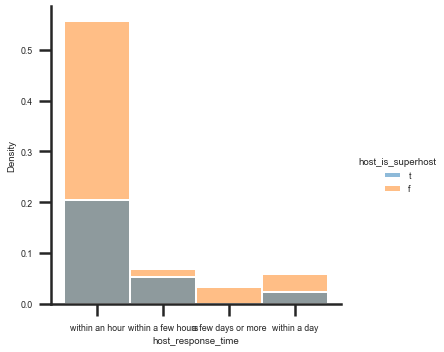

In [145]:
# Check host_response_time
print(listings.host_response_time.value_counts())
sns.displot(listings, x="host_response_time", hue = "host_is_superhost",stat="density")

Entire home/apt    2030
Private room       1180
Hotel room           25
Shared room          14
Name: room_type, dtype: int64


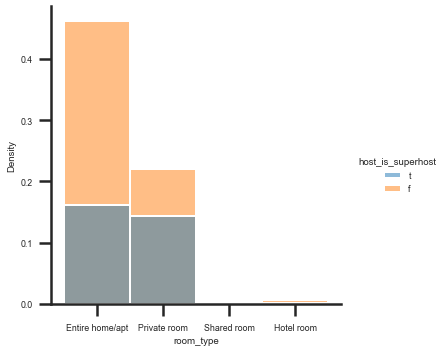

In [146]:
# Check room_type
print(listings.room_type.value_counts())
sns.displot(listings, x="room_type", hue = "host_is_superhost",stat="density")

In [147]:
# Check neighbourhood_cleansed
print(listings.property_type.value_counts())


Entire rental unit                     1307
Private room in rental unit             578
Private room in residential home        377
Entire condominium (condo)              270
Entire serviced apartment               210
Entire residential home                 128
Private room in condominium (condo)      71
Entire guest suite                       44
Room in boutique hotel                   43
Private room in townhouse                39
Entire townhouse                         34
Room in hotel                            32
Private room in bed and breakfast        30
Entire loft                              19
Private room in guest suite              18
Private room in loft                     10
Shared room in rental unit                7
Boat                                      6
Entire guesthouse                         5
Shared room in residential home           3
Entire place                              3
Private room in bungalow                  2
Houseboat                       

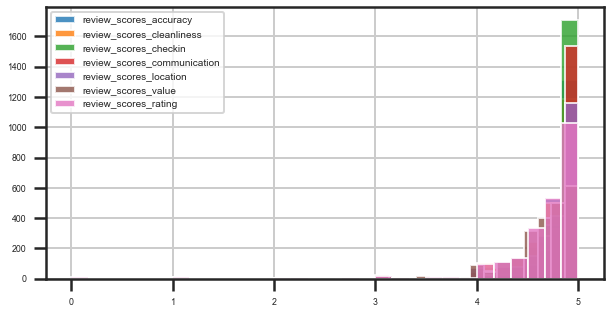

In [148]:
# Check review score
review_col = [ 'review_scores_accuracy', 'review_scores_cleanliness',
       'review_scores_checkin', 'review_scores_communication',
       'review_scores_location', 'review_scores_value','review_scores_rating']

review_df = listings[review_col].copy()
fig, ax = plt.subplots(figsize=(10, 5))
for col in review_col:    
    review_df[col].hist(bins=30, alpha=0.8)
    #plt.title(col)
    
plt.legend(review_col, loc='upper left', fontsize = 10)    

# 2. Data Pre-Processing

So from our observasion, I selects the listings dataset to be the one that I will mainly working on. 

In [149]:
listings.columns

Index(['id', 'listing_url', 'scrape_id', 'last_scraped', 'name', 'description',
       'neighborhood_overview', 'picture_url', 'host_id', 'host_url',
       'host_name', 'host_since', 'host_location', 'host_about',
       'host_response_time', 'host_response_rate', 'host_acceptance_rate',
       'host_is_superhost', 'host_thumbnail_url', 'host_picture_url',
       'host_neighbourhood', 'host_listings_count',
       'host_total_listings_count', 'host_verifications',
       'host_has_profile_pic', 'host_identity_verified', 'neighbourhood',
       'neighbourhood_cleansed', 'neighbourhood_group_cleansed', 'latitude',
       'longitude', 'property_type', 'room_type', 'accommodates', 'bathrooms',
       'bathrooms_text', 'bedrooms', 'beds', 'amenities', 'price',
       'minimum_nights', 'maximum_nights', 'minimum_minimum_nights',
       'maximum_minimum_nights', 'minimum_maximum_nights',
       'maximum_maximum_nights', 'minimum_nights_avg_ntm',
       'maximum_nights_avg_ntm', 'calendar_upd

#### Remove columns that have more than 75% of missing values

In [150]:
colum_list = list(listings.columns[listings.isnull().mean()>0.75])
colum_list

['neighbourhood_group_cleansed', 'bathrooms', 'calendar_updated']

In [151]:
# Dropping columns with more than 75% of missing Data
listings = listings.drop(colum_list, axis=1)
listings = listings.dropna(subset=['price'], axis=0)
listings.shape

(3249, 71)

In [152]:
##Checking if there is duplicates values
listings.duplicated().sum()

0

In [153]:
# Check for neighbourhood features
listings[['neighbourhood','neighbourhood_cleansed']].isnull().sum()

neighbourhood             1113
neighbourhood_cleansed       0
dtype: int64

Selected some columns that I'm goining to use as features in the price prediction model

In [154]:
listings_clean = listings[['id','host_response_time','host_response_rate','host_acceptance_rate',
          'host_is_superhost','host_total_listings_count',
          'host_has_profile_pic','host_identity_verified','neighbourhood_cleansed','latitude',
         'longitude', 'property_type', 'room_type', 'accommodates', 'bathrooms_text','bedrooms',
          'beds','amenities','price','minimum_nights', 'maximum_nights', 'minimum_minimum_nights',
           'maximum_minimum_nights', 'minimum_maximum_nights','maximum_maximum_nights', 
           'minimum_nights_avg_ntm','maximum_nights_avg_ntm','has_availability',
           'availability_30', 'availability_60', 'availability_90',
           'availability_365', 'number_of_reviews', 'number_of_reviews_l30d', 
            'review_scores_rating','review_scores_accuracy',
           'review_scores_cleanliness', 'review_scores_checkin',
           'review_scores_communication', 'review_scores_location',
           'review_scores_value', 'instant_bookable',
           'calculated_host_listings_count',
           'calculated_host_listings_count_entire_homes',
           'calculated_host_listings_count_private_rooms',
           'calculated_host_listings_count_shared_rooms', 'reviews_per_month']]

listings_clean.head()

id  host_response_time host_response_rate host_acceptance_rate  \
0   3781                 NaN                NaN                  NaN   
1   5506      within an hour               100%                  97%   
2   6695      within an hour               100%                  97%   
3   8789  within a few hours               100%                  59%   
4  10730  within a few hours               100%                  59%   

  host_is_superhost  host_total_listings_count host_has_profile_pic  \
0                 t                          5                    t   
1                 t                          4                    t   
2                 t                          4                    t   
3                 t                          8                    t   
4                 t                          8                    t   

  host_identity_verified neighbourhood_cleansed  latitude  longitude  \
0                      f            East Boston  42.36413  -71.02991   
1                      t                Roxbury  42.32844  -71.09581   
2                      t                Roxbury  42.32802  -71.09387   
3                      t            Beacon Hill  42.35867  -71.06307   
4                      t               Downtown  42.35906  -71.06271   

                property_type        room_type  accommodates bathrooms_text  \
0          Entire rental unit  Entire home/apt             2         1 bath   
1          Entire guest suite  Entire home/apt             2         1 bath   
2  Entire condominium (condo)  Entire home/apt             4         1 bath   
3          Entire rental unit  Entire home/apt             2         1 bath   
4          Entire rental unit  Entire home/apt             2         1 bath   

   bedrooms  beds                                          amenities    price  \
0       1.0   0.0  ["Shampoo", "Microwave", "Patio or balcony", "...  $125.00   
1       1.0   1.0  ["Shampoo", "Microwave", "Air conditioning", "...  $124.00   
2       NaN   0.0  ["Shampoo", "Microwave", "Stove", "Air conditi...  $164.00   
3       1.0   1.0  ["Microwave", "Patio or balcony", "Stove", "Ai...  $110.00   
4       1.0   1.0  ["Microwave", "Patio or balcony", "Stove", "Ai...  $100.00   

   minimum_nights  maximum_nights  minimum_minimum_nights  \
0              32            1125                    32.0   
1               3              90                     3.0   
2               3             730                     2.0   
3              91             365                    91.0   
4              91             365                    91.0   

   maximum_minimum_nights  minimum_maximum_nights  maximum_maximum_nights  \
0                    32.0                  1125.0                  1125.0   
1                     3.0                  1125.0                  1125.0   
2                     3.0                   730.0                   730.0   
3                    91.0                   365.0                   365.0   
4                    91.0                   365.0                   365.0   

   minimum_nights_avg_ntm  maximum_nights_avg_ntm has_availability  \
0                    32.0                  1125.0                t   
1                     3.0                  1125.0                t   
2                     3.0                   730.0                t   
3                    91.0                   365.0                t   
4                    91.0                   365.0                t   

   availability_30  availability_60  availability_90  availability_365  \
0                5                5                5                82   
1                7               37               51                51   
2               10               33               47                47   
3                5               35               65               340   
4                0                2               32               307   

   number_of_reviews  number_of_reviews_l30d  review_sc

As we clearly can see there are mainly 2 categories of feature: 
- 1) Numerical Features - For Example: price, host_response_rate, review_scores_value, bedrooms
- 2) Categorical Features - For Example: host_response_time, host_is_superhost, neighbourhood_cleansed

But there are some features that have to specially taken care of, like amenities, latitude, longitude which I will process later in this section.

#### 1) Numerical Features

In [155]:
#Convert numerical columns to float from string

for col in ['host_response_rate', 'host_acceptance_rate','price']:
    listings_clean[col] = listings_clean[col].str.replace('$','').str.replace('%','').str.replace(',','').astype('float64')
    
listings_clean['bathrooms_text'] = listings_clean['bathrooms_text'].str.extract('(\d+)')
listings_clean['bathrooms_text'] = listings_clean['bathrooms_text'].astype(float, errors = 'raise')
listings_clean = listings_clean.rename(columns = {'bathrooms_text': 'bathrooms'}, inplace = False)

C:\Users\Phongsapon\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  after removing the cwd from sys.path.
C:\Users\Phongsapon\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
C:\Users\Phongsapon\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.or

In [156]:
listings_clean[['host_response_rate', 'host_acceptance_rate','price','bathrooms']]

host_response_rate  host_acceptance_rate  price  bathrooms
0                    NaN                   NaN  125.0        1.0
1                  100.0                  97.0  124.0        1.0
2                  100.0                  97.0  164.0        1.0
3                  100.0                  59.0  110.0        1.0
4                  100.0                  59.0  100.0        1.0
...                  ...                   ...    ...        ...
3244                 NaN                   NaN  220.0        2.0
3245                98.0                  98.0  211.0        1.0
3246                 NaN                   NaN   55.0        1.0
3247                 NaN                   NaN   55.0        2.0
3248                 NaN                   NaN   54.0        2.0

[3249 rows x 4 columns]

There are 25 distinct neighbourhood


Text(0.5, 0, 'Average price')

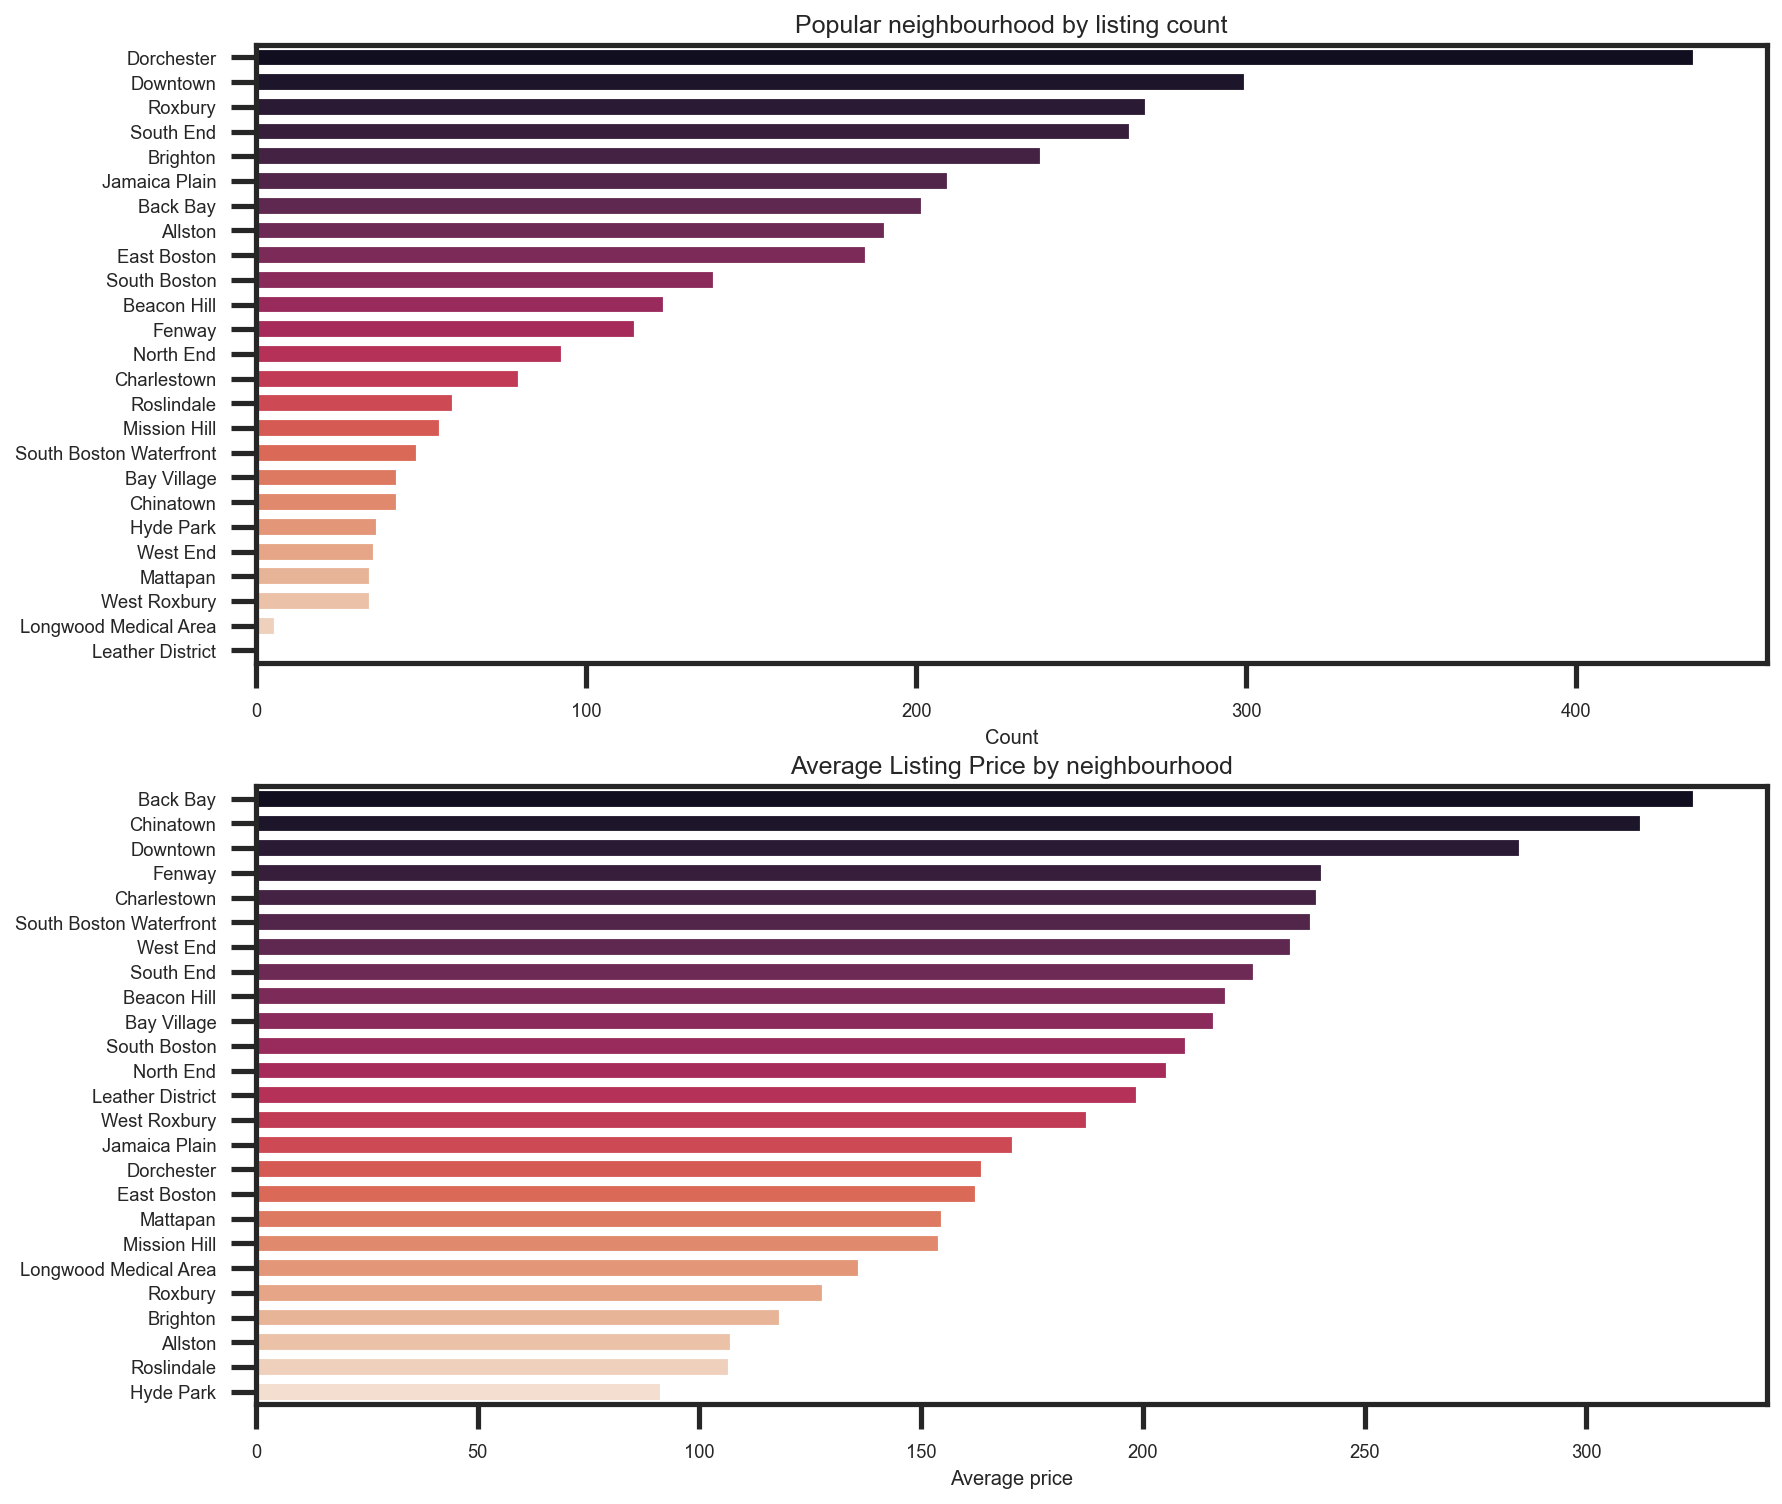

In [157]:
neighbourhood = listings_clean[['neighbourhood_cleansed','id','price']].groupby('neighbourhood_cleansed').agg({'id':"count" , 'price':np.mean}).reset_index().rename(columns={'neighbourhood_cleansed':'neighbourhood','id':'count'}).sort_values(by='count', ascending=False)
print(f"There are {len(listings_clean['neighbourhood_cleansed'].value_counts())} distinct neighbourhood")

#There are 25 distinct neighbourhood
#top_area=boston_listings['neighbourhood_cleansed'].value_counts()#.plot(kind='barh')
fig,(ax1,ax2) = plt.subplots(2,1,figsize=(13,12),dpi=150)
#top_area[:20].sort_values().plot(kind='barh').set_title('Fig 3: Top 20 neighbourhoods',fontsize=12, weight='bold');
plot_data = listings_clean[['neighbourhood_cleansed','id','price']].groupby('neighbourhood_cleansed').agg({'id':'count','price':'mean'}).reset_index()
plot_data.columns=['neighbourhood','listing_count','price']
plot_data1= plot_data[['neighbourhood','listing_count']].sort_values(by='listing_count', ascending=False)
plot_data2= plot_data[['neighbourhood','price']].sort_values(by='price', ascending=False)

sns.barplot(data=plot_data1, y='neighbourhood',palette="rocket",x='listing_count',ax=ax1).set_title('Popular neighbourhood by listing count',fontsize=12)
sns.barplot(data=plot_data2, y='neighbourhood',palette="rocket",x='price',ax=ax2).set_title('Average Listing Price by neighbourhood',fontsize=12,)
ax1.set_ylabel('')
ax2.set_ylabel('')
ax1.set_xlabel('Count')
ax2.set_xlabel('Average price')

Dorchester and Downtown have a lot of Airbnb listings in Boston, but the most average price goes to Back Bay and Chinatown, so it could lead us to some clues that the price may have varied due to the different type of room.

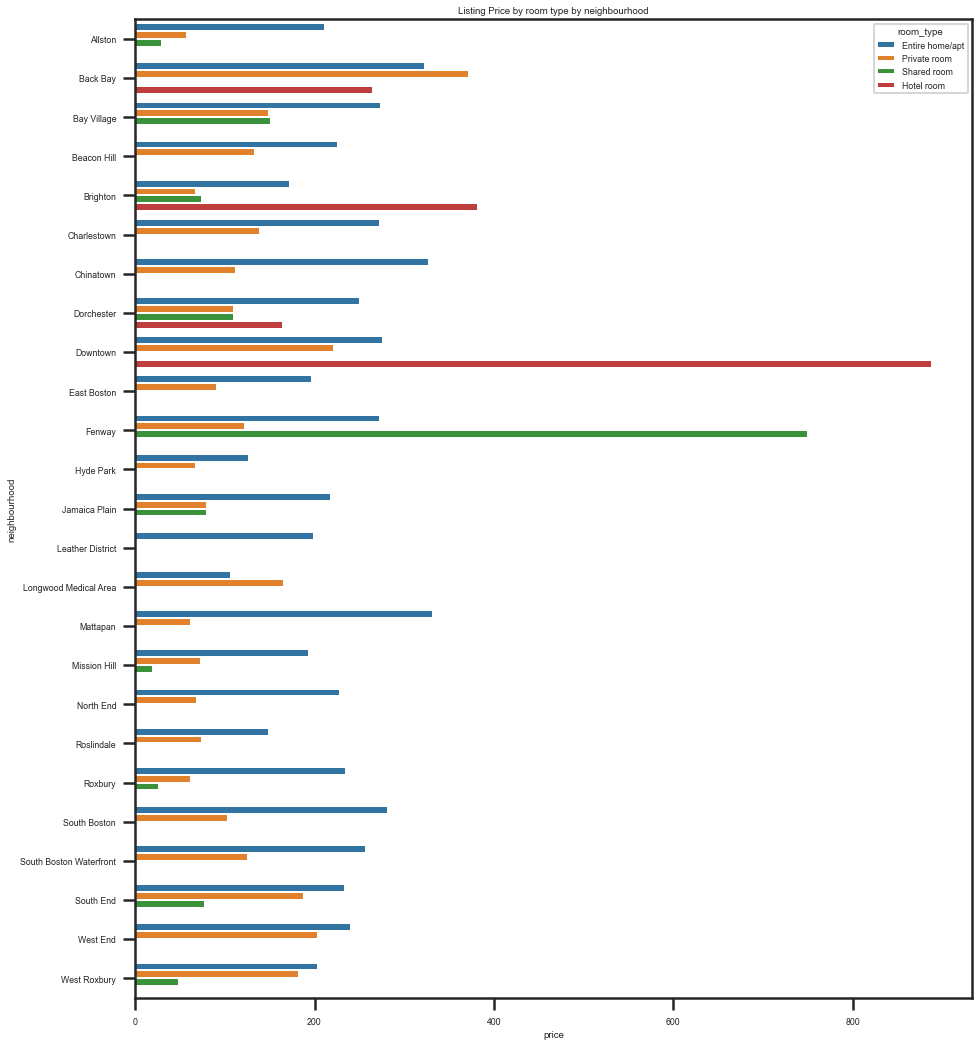

In [158]:
#mean price by neighbourhood and room type
plt.figure(figsize=(15,18))
plot_data = listings_clean[['neighbourhood_cleansed','room_type','price']].groupby(['neighbourhood_cleansed','room_type']).mean().reset_index()
plot_data.columns = ['neighbourhood','room_type','price']
plot_data.sort_values(by=['price','neighbourhood','room_type'], ascending=False)
#plot_data
sns.barplot(data=plot_data, y='neighbourhood',x='price',hue='room_type').set_title('Listing Price by room type by neighbourhood');


The figure showed The listing price by room type and neighborhood. We could summarize that the average price in Back Bay and Chinatown tends to have more expensive listings due to the Entire home/apt room type. From the plot, Downtown seems to be a popular place with and high listing price for overall room type since it appears at top of the popular neighborhoods and average listing prices plots.

In [159]:
listings_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3249 entries, 0 to 3248
Data columns (total 47 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   id                                            3249 non-null   int64  
 1   host_response_time                            2299 non-null   object 
 2   host_response_rate                            2299 non-null   float64
 3   host_acceptance_rate                          2375 non-null   float64
 4   host_is_superhost                             3249 non-null   object 
 5   host_total_listings_count                     3249 non-null   int64  
 6   host_has_profile_pic                          3249 non-null   object 
 7   host_identity_verified                        3249 non-null   object 
 8   neighbourhood_cleansed                        3249 non-null   object 
 9   latitude                                      3249 non-null   f

In [160]:
listings_clean.head()

id  host_response_time  host_response_rate  host_acceptance_rate  \
0   3781                 NaN                 NaN                   NaN   
1   5506      within an hour               100.0                  97.0   
2   6695      within an hour               100.0                  97.0   
3   8789  within a few hours               100.0                  59.0   
4  10730  within a few hours               100.0                  59.0   

  host_is_superhost  host_total_listings_count host_has_profile_pic  \
0                 t                          5                    t   
1                 t                          4                    t   
2                 t                          4                    t   
3                 t                          8                    t   
4                 t                          8                    t   

  host_identity_verified neighbourhood_cleansed  latitude  longitude  \
0                      f            East Boston  42.36413  -71.02991   
1                      t                Roxbury  42.32844  -71.09581   
2                      t                Roxbury  42.32802  -71.09387   
3                      t            Beacon Hill  42.35867  -71.06307   
4                      t               Downtown  42.35906  -71.06271   

                property_type        room_type  accommodates  bathrooms  \
0          Entire rental unit  Entire home/apt             2        1.0   
1          Entire guest suite  Entire home/apt             2        1.0   
2  Entire condominium (condo)  Entire home/apt             4        1.0   
3          Entire rental unit  Entire home/apt             2        1.0   
4          Entire rental unit  Entire home/apt             2        1.0   

   bedrooms  beds                                          amenities  price  \
0       1.0   0.0  ["Shampoo", "Microwave", "Patio or balcony", "...  125.0   
1       1.0   1.0  ["Shampoo", "Microwave", "Air conditioning", "...  124.0   
2       NaN   0.0  ["Shampoo", "Microwave", "Stove", "Air conditi...  164.0   
3       1.0   1.0  ["Microwave", "Patio or balcony", "Stove", "Ai...  110.0   
4       1.0   1.0  ["Microwave", "Patio or balcony", "Stove", "Ai...  100.0   

   minimum_nights  maximum_nights  minimum_minimum_nights  \
0              32            1125                    32.0   
1               3              90                     3.0   
2               3             730                     2.0   
3              91             365                    91.0   
4              91             365                    91.0   

   maximum_minimum_nights  minimum_maximum_nights  maximum_maximum_nights  \
0                    32.0                  1125.0                  1125.0   
1                     3.0                  1125.0                  1125.0   
2                     3.0                   730.0                   730.0   
3                    91.0                   365.0                   365.0   
4                    91.0                   365.0                   365.0   

   minimum_nights_avg_ntm  maximum_nights_avg_ntm has_availability  \
0                    32.0                  1125.0                t   
1                     3.0                  1125.0                t   
2                     3.0                   730.0                t   
3                    91.0                   365.0                t   
4                    91.0                   365.0                t   

   availability_30  availability_60  availability_90  availability_365  \
0                5                5                5                82   
1                7               37               51                51   
2               10               33               47                47   
3                5               35               65               340   
4                0                2               32               307   

   number_of_reviews  number_of_reviews_l30d  review_scores_rating  \
0        

C:\Users\Phongsapon\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  after removing the cwd from sys.path.


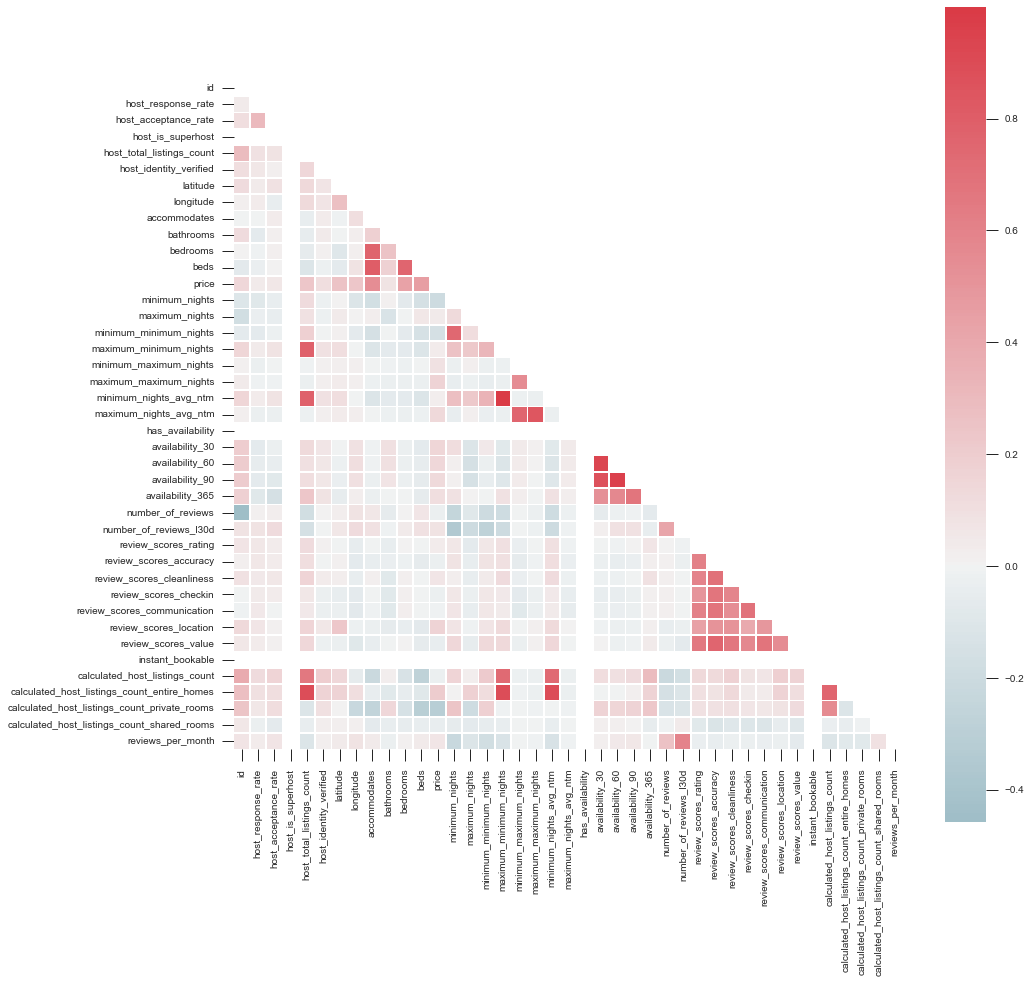

In [315]:
# #Using Pearson Correlation

corr = listings_clean.corr()
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

f, ax = plt.subplots(figsize=(15, 15))
cmap = sns.diverging_palette(220, 10, as_cmap=True)

sns.heatmap(corr, mask=mask, cmap=cmap,
            center=0, square=True, linewidths = .5)
plt.show()

In [263]:
#Correlation with output variable
cor_target = abs(cor["price"])
#Selecting highly correlated features
relevant_features = cor_target[cor_target>0.2]
relevant_features

host_total_listings_count                       0.240639
latitude                                        0.258671
longitude                                       0.236634
accommodates                                    0.543081
bedrooms                                        0.431367
beds                                            0.453542
price                                           1.000000
calculated_host_listings_count_entire_homes     0.212978
calculated_host_listings_count_private_rooms    0.312430
Name: price, dtype: float64

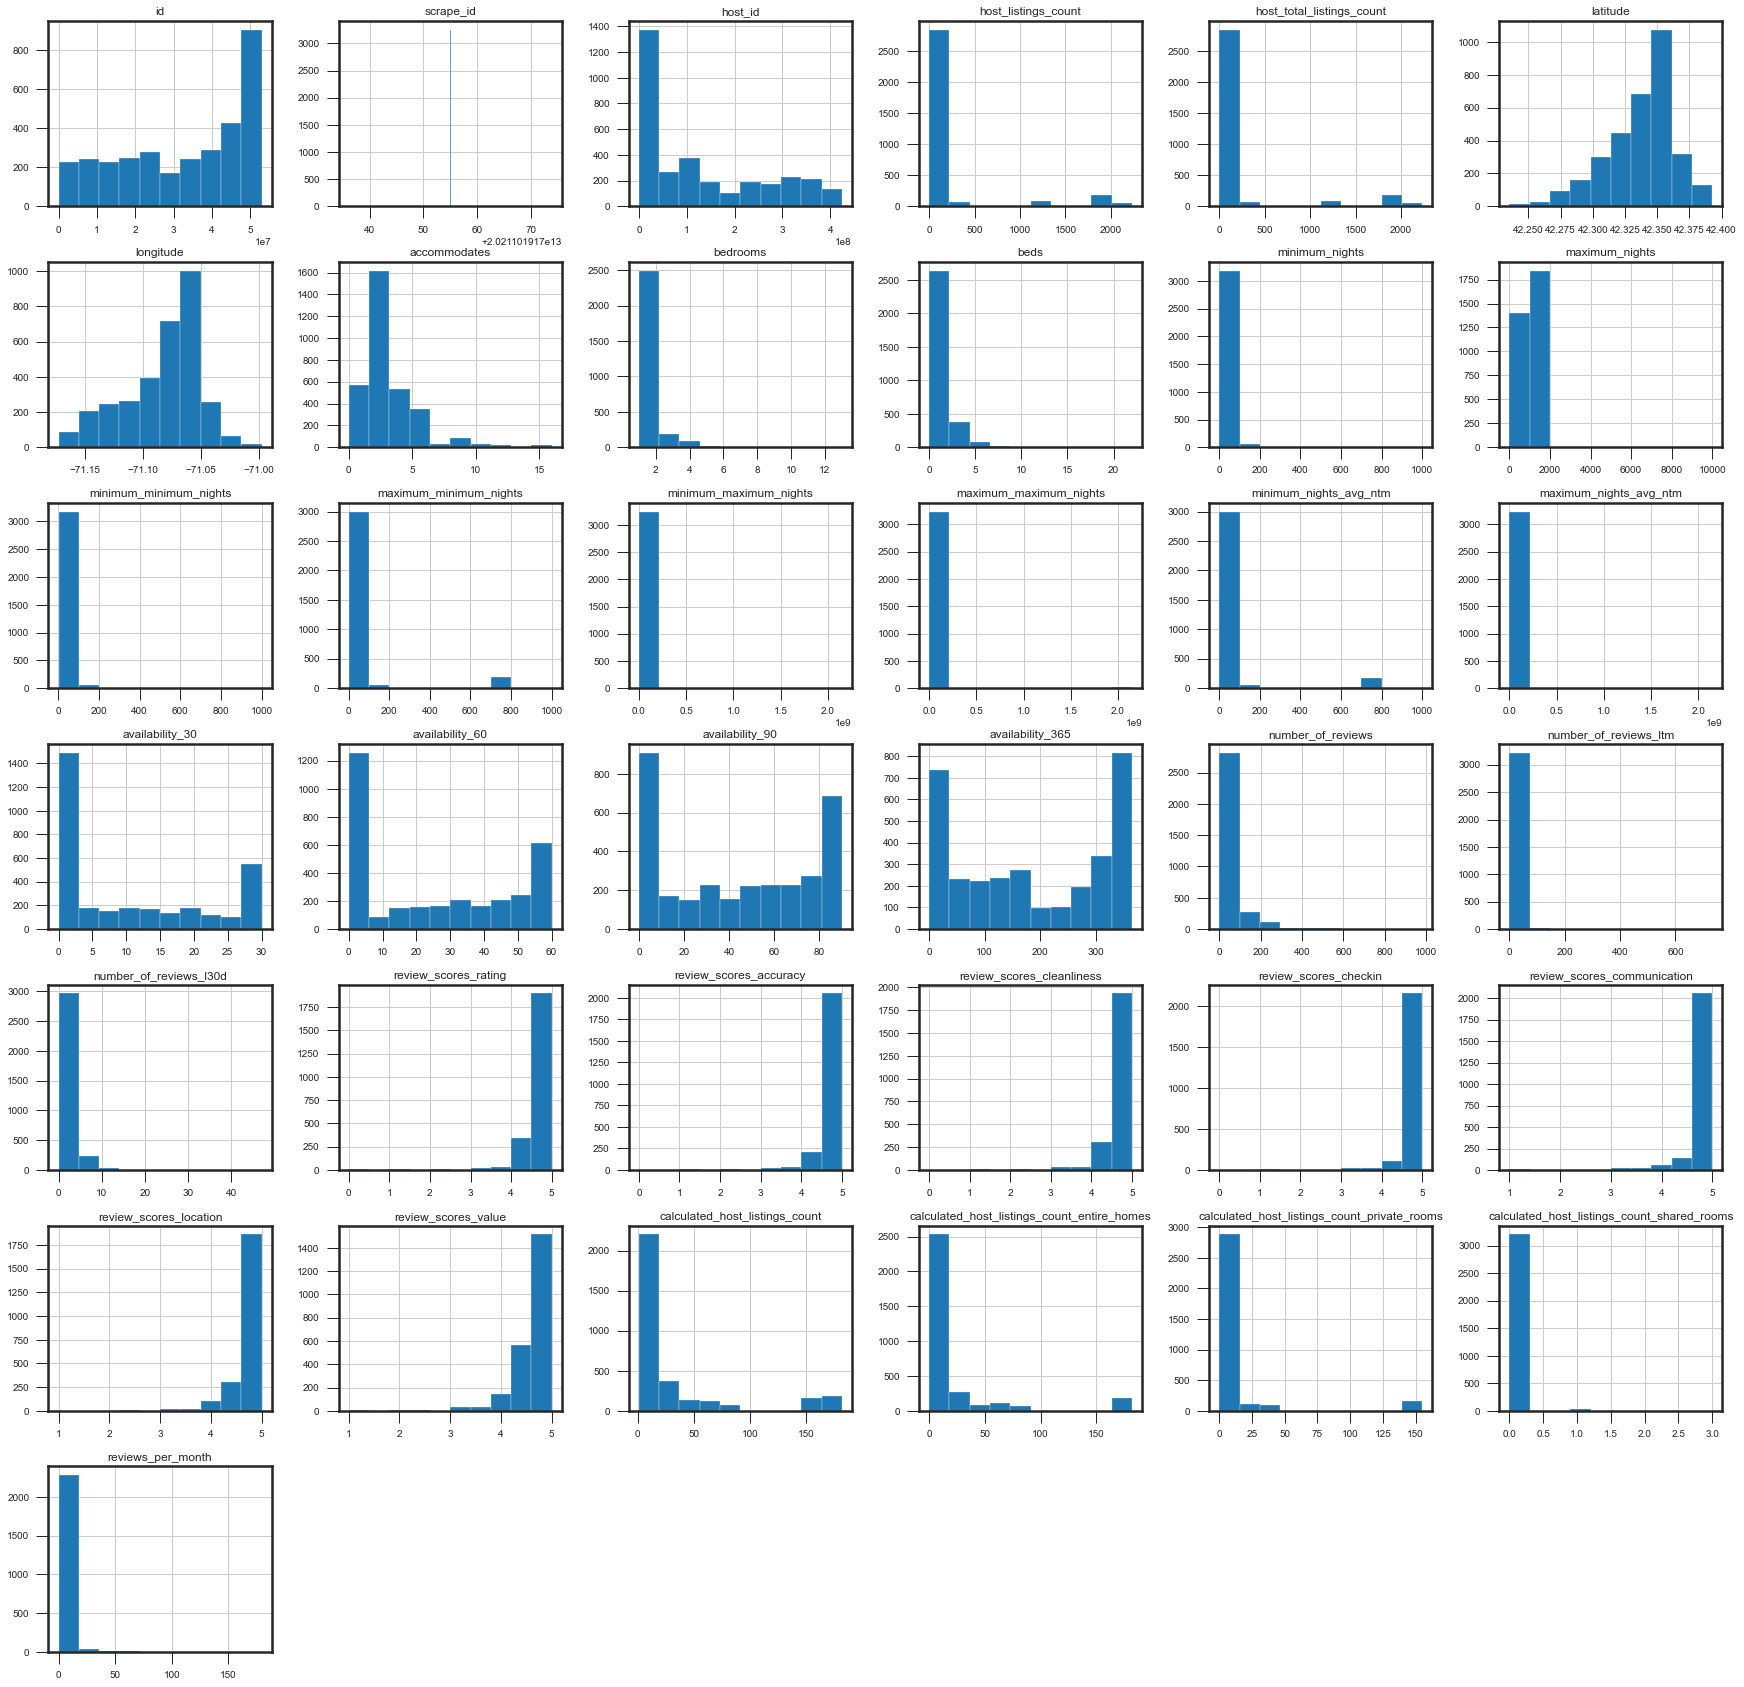

In [162]:
non_obj_col = list(listings.dtypes[listings.dtypes!='object'].index) 

listings[non_obj_col].hist(grid=True, figsize=(30, 30));

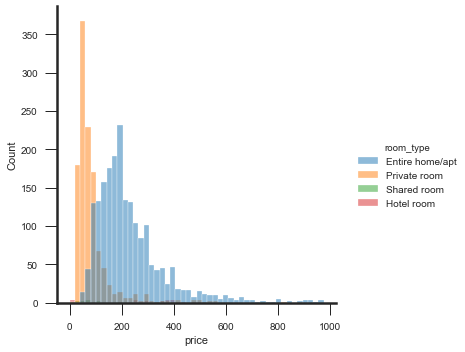

In [163]:
sns.displot(listings_clean.loc[listings_clean.price < 1000], x="price", hue = "room_type")


In [164]:
print("Skewness is {}".format(skew(listings_clean.price)))
print("The mean is {}".format(np.mean(listings_clean.price)))
print("The median is {}".format(np.median(listings_clean.price))) 
print(listings_clean.price.describe())

Skewness is 18.323272539614678
The mean is 193.32225300092335
The median is 150.0
count     3249.000000
mean       193.322253
std        279.004737
min          0.000000
25%         79.000000
50%        150.000000
75%        234.000000
max      10000.000000
Name: price, dtype: float64


The minimum price per night is 0, the mean price is $193.32, the median price is $150. Finally the maximum price is $10,000

In [165]:
# computing the quartiles and the interquartile range
Q1 = np.percentile(listings_clean.price,25)
Q3 = np.percentile(listings_clean.price,75)
IQR = Q3-Q1
lower_bound = Q1-(IQR*2.0)
upper_bound = Q3+(IQR*2.0)

print("All price lower than {0} and more than {1} will be considered as outliers.".format(lower_bound,upper_bound))


All price lower than -231.0 and more than 544.0 will be considered as outliers.


In [166]:
#dataframe of outliers
outdf=listings_clean.loc[(listings_clean.price<lower_bound) | (listings_clean.price>upper_bound)]
outdf=outdf.sort_values(by=['price','minimum_nights'],ascending=[1,0])
outdf[['neighbourhood_cleansed','room_type','minimum_nights','maximum_nights','price']].tail(5)


neighbourhood_cleansed        room_type  minimum_nights  maximum_nights  \
1472               Downtown       Hotel room               1            1125   
581                Downtown  Entire home/apt             180            1125   
387                Back Bay  Entire home/apt              91            1125   
735                Back Bay  Entire home/apt              91            1125   
1770             Dorchester     Private room               1            1125   

        price  
1472   2667.0  
581    3999.0  
387    5000.0  
735    5000.0  
1770  10000.0

<Figure size 576x396 with 0 Axes>

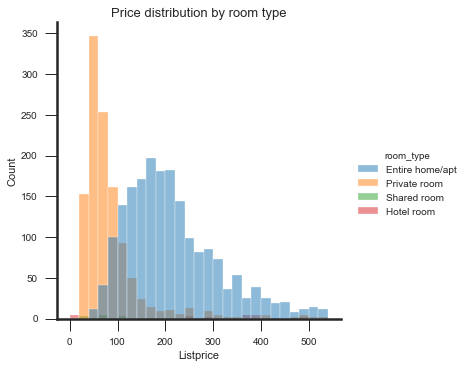

In [167]:
listings_clean = listings_clean.loc[(listings_clean.price>lower_bound) & (listings_clean.price<upper_bound)]
fig = plt.figure()
sns.displot(listings_clean,x='price', hue='room_type')
plt.title('Price distribution by room type',fontsize=13)
plt.xlabel('Listprice')
plt.show()


#### 2) Categorical Features

In [168]:
categorical_col = list(listings_clean.dtypes[listings_clean.dtypes=='object'].index)

In [169]:
categorical_col

['host_response_time',
 'host_is_superhost',
 'host_has_profile_pic',
 'host_identity_verified',
 'neighbourhood_cleansed',
 'property_type',
 'room_type',
 'amenities',
 'has_availability',
 'instant_bookable']

In [170]:
import statsmodels.api as sm
from statsmodels.formula.api import ols
Anova_test_F_value=[]
Anova_test_p_value=[]
variable_name_list=[]
for variable in categorical_col: 
    mod = ols('price ~ '+ variable, data = listings_clean).fit()
    aov_table = sm.stats.anova_lm(mod, typ=2)
    Fvalue=aov_table.loc[variable, 'F']
    Pvalue=aov_table.loc[variable, 'PR(>F)']
    variable_name_list.append(variable)
    Anova_test_F_value.append(Fvalue)
    Anova_test_p_value.append(Pvalue)

Anova_categorical_variable_test=pd.DataFrame({"Variable": variable_name_list, "F Value":Anova_test_F_value, \
                                              "P Value":Anova_test_p_value })

In [171]:
Anova_categorical_variable_test.sort_values(by='F Value', ascending=False)

Variable     F Value        P Value
6               room_type  543.379146  2.012186e-284
9        instant_bookable  295.472427   2.310984e-63
1       host_is_superhost   91.772735   1.903209e-21
5           property_type   81.762995   0.000000e+00
4  neighbourhood_cleansed   39.608075  2.661567e-160
3  host_identity_verified   34.304825   5.198984e-09
0      host_response_time   28.727203   3.206495e-18
7               amenities   10.728860  4.196781e-202
8        has_availability    8.897622   2.877382e-03
2    host_has_profile_pic    0.091702   7.620448e-01

We can conclude that there is very low in statistically significant by F Value and P Value on 3 features 'host_identity_verified','instant_bookable','has_availability'

In [172]:
drop_col = ['host_has_profile_pic']
listings_clean = listings_clean.drop(drop_col, axis=1)

In [173]:
listings_clean.head()

id  host_response_time  host_response_rate  host_acceptance_rate  \
0   3781                 NaN                 NaN                   NaN   
1   5506      within an hour               100.0                  97.0   
2   6695      within an hour               100.0                  97.0   
3   8789  within a few hours               100.0                  59.0   
4  10730  within a few hours               100.0                  59.0   

  host_is_superhost  host_total_listings_count host_identity_verified  \
0                 t                          5                      f   
1                 t                          4                      t   
2                 t                          4                      t   
3                 t                          8                      t   
4                 t                          8                      t   

  neighbourhood_cleansed  latitude  longitude               property_type  \
0            East Boston  42.36413  -71.02991          Entire rental unit   
1                Roxbury  42.32844  -71.09581          Entire guest suite   
2                Roxbury  42.32802  -71.09387  Entire condominium (condo)   
3            Beacon Hill  42.35867  -71.06307          Entire rental unit   
4               Downtown  42.35906  -71.06271          Entire rental unit   

         room_type  accommodates  bathrooms  bedrooms  beds  \
0  Entire home/apt             2        1.0       1.0   0.0   
1  Entire home/apt             2        1.0       1.0   1.0   
2  Entire home/apt             4        1.0       NaN   0.0   
3  Entire home/apt             2        1.0       1.0   1.0   
4  Entire home/apt             2        1.0       1.0   1.0   

                                           amenities  price  minimum_nights  \
0  ["Shampoo", "Microwave", "Patio or balcony", "...  125.0              32   
1  ["Shampoo", "Microwave", "Air conditioning", "...  124.0               3   
2  ["Shampoo", "Microwave", "Stove", "Air conditi...  164.0               3   
3  ["Microwave", "Patio or balcony", "Stove", "Ai...  110.0              91   
4  ["Microwave", "Patio or balcony", "Stove", "Ai...  100.0              91   

   maximum_nights  minimum_minimum_nights  maximum_minimum_nights  \
0            1125                    32.0                    32.0   
1              90                     3.0                     3.0   
2             730                     2.0                     3.0   
3             365                    91.0                    91.0   
4             365                    91.0                    91.0   

   minimum_maximum_nights  maximum_maximum_nights  minimum_nights_avg_ntm  \
0                  1125.0                  1125.0                    32.0   
1                  1125.0                  1125.0                     3.0   
2                   730.0                   730.0                     3.0   
3                   365.0                   365.0                    91.0   
4                   365.0                   365.0                    91.0   

   maximum_nights_avg_ntm has_availability  availability_30  availability_60  \
0                  1125.0                t                5                5   
1                  1125.0                t                7               37   
2                   730.0                t               10               33   
3                   365.0                t                5               35   
4                   365.0                t                0                2   

   availability_90  availability_365  number_of_reviews  \
0                5                82                 21   
1               51                51                109   
2               47                47                116   
3               65               340                 25   
4               32               307                 32   

   number_of_reviews_l30d  review_scores_rating  review_scores_accuracy  \
0               

In [218]:
impute_median_col = ['host_response_time', 'host_response_rate','host_acceptance_rate',
                     'host_total_listings_count',
                    'bathrooms','bedrooms','beds',
                    'minimum_minimum_nights','maximum_minimum_nights', 'minimum_maximum_nights',
                    'maximum_maximum_nights', 'minimum_nights_avg_ntm','maximum_nights_avg_ntm',
                   'review_scores_rating','review_scores_accuracy',
                   'review_scores_cleanliness', 'review_scores_checkin',
                   'review_scores_communication', 'review_scores_location',
                   'review_scores_value','reviews_per_month']


# impute mode in the missing categorical values
for col in impute_median_col:
    listings_clean[col].fillna(listings_clean[col].mode()[0], inplace=True)
    
#Binary t, f features chaging to 1, 0
tf_col = ['host_is_superhost','instant_bookable','has_availability','host_identity_verified']
for col in tf_col:
    listings_clean[col] = np.where(listings_clean[col] == 'f',0,1)



In [219]:
listings_clean

id  host_response_time  host_response_rate  host_acceptance_rate  \
0         3781      within an hour               100.0                 100.0   
1         5506      within an hour               100.0                  97.0   
2         6695      within an hour               100.0                  97.0   
3         8789  within a few hours               100.0                  59.0   
4        10730  within a few hours               100.0                  59.0   
...        ...                 ...                 ...                   ...   
3244  52856176      within an hour               100.0                 100.0   
3245  52863673      within an hour                98.0                  98.0   
3246  52872248      within an hour               100.0                 100.0   
3247  52872801      within an hour               100.0                 100.0   
3248  52873214      within an hour               100.0                 100.0   

      host_is_superhost  host_total_listings_count  host_identity_verified  \
0                     1                          5                       0   
1                     1                          4                       1   
2                     1                          4                       1   
3                     1                          8                       1   
4                     1                          8                       1   
...                 ...                        ...                     ...   
3244                  1                          0                       1   
3245                  1                         43                       1   
3246                  1                          1                       1   
3247                  1                          1                       1   
3248                  1                          1                       1   

     neighbourhood_cleansed   latitude  longitude  \
0               East Boston  42.364130 -71.029910   
1                   Roxbury  42.328440 -71.095810   
2                   Roxbury  42.328020 -71.093870   
3               Beacon Hill  42.358670 -71.063070   
4                  Downtown  42.359060 -71.062710   
...                     ...        ...        ...   
3244           South Boston  42.333945 -71.048292   
3245               Downtown  42.357621 -71.061692   
3246               Brighton  42.354557 -71.144149   
3247               Downtown  42.359005 -71.058203   
3248                Allston  42.356447 -71.132326   

                    property_type        room_type  accommodates  bathrooms  \
0              Entire rental unit  Entire home/apt             2        1.0   
1              Entire guest suite  Entire home/apt             2        1.0   
2      Entire condominium (condo)  Entire home/apt             4        1.0   
3              Entire rental unit  Entire home/apt             2        1.0   
4              Entire rental unit  Entire home/apt             2        1.0   
...                           ...              ...           ...        ...   
3244   Entire condominium (condo)  Entire home/apt             4        2.0   
3245           Entire rental unit  Entire home/apt             2        1.0   
3246  Private room in rental unit     Private room             1        1.0   
3247  Private room in rental unit     Private room             1        2.0   
3248  Private room in rental unit     Private room             1        2.0   

      bedrooms  beds                                          amenities  \
0          1.0   0.0  ["Shampoo", "Microwave", "Patio or balcony", "...   
1          1.0   1.0  ["Shampoo", "Microwave", "Air conditioning", "...   
2          1.0   0.0  ["Shampoo", "Microwave", "Stove", "Air conditi...   
3          1.0   1.0  ["Microwave", "Patio or balcony", "Stove", "Ai...   
4          1.0   1.0  ["Microwave", "Patio or balcony", "Stove", "Ai...   
...        ...   ...                                                ...   
324

In [220]:
listings_clean.isnull().sum()

id                                              0
host_response_time                              0
host_response_rate                              0
host_acceptance_rate                            0
host_is_superhost                               0
host_total_listings_count                       0
host_identity_verified                          0
neighbourhood_cleansed                          0
latitude                                        0
longitude                                       0
property_type                                   0
room_type                                       0
accommodates                                    0
bathrooms                                       0
bedrooms                                        0
beds                                            0
amenities                                       0
price                                           0
minimum_nights                                  0
maximum_nights                                  0


Next we will have to handle with multiple categories in a single column.

In [221]:
listings_clean[['latitude', 'longitude','amenities']].head()

latitude  longitude                                          amenities
0  42.36413  -71.02991  ["Shampoo", "Microwave", "Patio or balcony", "...
1  42.32844  -71.09581  ["Shampoo", "Microwave", "Air conditioning", "...
2  42.32802  -71.09387  ["Shampoo", "Microwave", "Stove", "Air conditi...
3  42.35867  -71.06307  ["Microwave", "Patio or balcony", "Stove", "Ai...
4  42.35906  -71.06271  ["Microwave", "Patio or balcony", "Stove", "Ai...

##### amenities

In [222]:
listings_clean['amenities'][:1]

0    ["Shampoo", "Microwave", "Patio or balcony", "...
Name: amenities, dtype: object

In [223]:
amenities_list = list(listings.amenities)
amenities_list_string = " ".join(amenities_list)
amenities_list_string = amenities_list_string.replace('[', '')
amenities_list_string = amenities_list_string.replace(']', ',')
amenities_list_string = amenities_list_string.replace('"', '')
amenities_set = [x.strip() for x in amenities_list_string.split(',')]
amenities_set = set(amenities_set)
amenities_set

{'',
 '2-5 years old',
 '21\\ HDTV with Roku',
 '24-hour fitness center',
 '32\\ HDTV',
 '32\\ HDTV with',
 '32\\ HDTV with Amazon Prime Video',
 '32\\ HDTV with Netflix',
 '32\\ HDTV with standard cable',
 '36\\ HDTV with Apple TV',
 '37\\ HDTV with Amazon Prime Video',
 '40\\ HDTV with Amazon Prime Video',
 '40\\ HDTV with Roku',
 '40\\ HDTV with standard cable',
 '40\\ TV',
 '42\\ HDTV',
 '42\\ HDTV with Amazon Prime Video',
 '42\\ HDTV with Roku',
 '42\\ HDTV with standard cable',
 '43\\ HDTV with Amazon Prime Video',
 '43\\ HDTV with Roku',
 '45\\ HDTV with premium cable',
 '46\\ HDTV with standard cable',
 '48\\ HDTV',
 '48\\ HDTV with',
 '5-10 years old',
 '50\\ HDTV with Chromecast',
 '50\\ HDTV with Roku',
 '50\\ HDTV with standard cable',
 '52\\ HDTV',
 '52\\ HDTV with standard cable',
 '52\\ TV with standard cable',
 '54\\ HDTV with standard cable',
 '55\\ HDTV',
 '55\\ HDTV with Amazon Prime Video',
 '55\\ HDTV with Apple TV',
 '55\\ HDTV with HBO Max',
 '55\\ HDTV with Net

In [224]:
df = listings_clean.copy()

In [225]:
# df['amenities'] = df['amenities'].str.lower()

In [226]:
df.loc[df['amenities'].str.contains('24-hour check-in'), 'check_in_24h'] = 1
df.loc[df['amenities'].str.contains('Air conditioning|Central air conditioning'), 'air_conditioning'] = 1
df.loc[df['amenities'].str.contains('Amazon Echo|Apple TV|Game console|Netflix|Projector and screen|Smart TV'), 'high_end_electronics'] = 1
df.loc[df['amenities'].str.contains('BBQ grill|Fire pit|Propane barbeque'), 'bbq'] = 1
df.loc[df['amenities'].str.contains('Balcony|Patio'), 'balcony'] = 1
df.loc[df['amenities'].str.contains('Beach view|Beachfront|Lake access|Mountain view|Ski-in/Ski-out|Waterfront'), 'nature_and_views'] = 1
df.loc[df['amenities'].str.contains('linens'), 'bed_linen'] = 1
df.loc[df['amenities'].str.contains('breakfast'), 'breakfast'] = 1
df.loc[df['amenities'].str.contains('TV|tv'), 'tv'] = 1
df.loc[df['amenities'].str.contains('Coffee maker|Espresso machine'), 'coffee_machine'] = 1
df.loc[df['amenities'].str.contains('Cooking basics|Oven|oven|refrigerator|Refrigerator'), 'cooking_basics'] = 1
df.loc[df['amenities'].str.contains('Dishwasher|Dryer|Washer'), 'white_goods'] = 1
df.loc[df['amenities'].str.contains('Elevator'), 'elevator'] = 1
df.loc[df['amenities'].str.contains('Exercise equipment|Gym|gym'), 'gym'] = 1
df.loc[df['amenities'].str.contains('Family/kid friendly|Children|children'), 'child_friendly'] = 1
df.loc[df['amenities'].str.contains('Park|parking|park'), 'parking'] = 1
df.loc[df['amenities'].str.contains('Garden|Outdoor|Sun loungers|Terrace'), 'outdoor_space'] = 1
df.loc[df['amenities'].str.contains('Host greets you'), 'host_greeting'] = 1
df.loc[df['amenities'].str.contains('Hot tub|Jetted tub|hot tub|Sauna|Pool|pool'), 'hot_tub_sauna_or_pool'] = 1
df.loc[df['amenities'].str.contains('Internet|Pocket wifi|Wifi|wifi|Ethernet'), 'internet'] = 1
df.loc[df['amenities'].str.contains('Long term stays allowed'), 'long_term_stays'] = 1
df.loc[df['amenities'].str.contains('Pets|pet|Cat(s)|Dog(s)'), 'pets_allowed'] = 1
df.loc[df['amenities'].str.contains('Private entrance'), 'private_entrance'] = 1
df.loc[df['amenities'].str.contains('Safe|Security system'), 'secure'] = 1
df.loc[df['amenities'].str.contains('Self check-in'), 'self_check_in'] = 1
df.loc[df['amenities'].str.contains('Smoking allowed|smoking'), 'smoking_allowed'] = 1
df.loc[df['amenities'].str.contains('Step-free access|Wheelchair|Accessible'), 'accessible'] = 1
df.loc[df['amenities'].str.contains('Suitable for events'), 'event_suitable'] = 1
df.loc[df['amenities'].str.contains('Shower|Soap|soap|Shampoo|shampoo|conditioner|Conditioner|toiletries'), 'bath_facilities'] = 1
df.loc[df['amenities'].str.contains('Closet|closet|Wardrobe|wardrobe|Lockbox|Smart lock'), 'storage_facilities'] = 1


C:\Users\Phongsapon\Anaconda3\lib\site-packages\ipykernel_launcher.py:22: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.


In [227]:
df.head()

id  host_response_time  host_response_rate  host_acceptance_rate  \
0   3781      within an hour               100.0                 100.0   
1   5506      within an hour               100.0                  97.0   
2   6695      within an hour               100.0                  97.0   
3   8789  within a few hours               100.0                  59.0   
4  10730  within a few hours               100.0                  59.0   

   host_is_superhost  host_total_listings_count  host_identity_verified  \
0                  1                          5                       0   
1                  1                          4                       1   
2                  1                          4                       1   
3                  1                          8                       1   
4                  1                          8                       1   

  neighbourhood_cleansed  latitude  longitude               property_type  \
0            East Boston  42.36413  -71.02991          Entire rental unit   
1                Roxbury  42.32844  -71.09581          Entire guest suite   
2                Roxbury  42.32802  -71.09387  Entire condominium (condo)   
3            Beacon Hill  42.35867  -71.06307          Entire rental unit   
4               Downtown  42.35906  -71.06271          Entire rental unit   

         room_type  accommodates  bathrooms  bedrooms  beds  \
0  Entire home/apt             2        1.0       1.0   0.0   
1  Entire home/apt             2        1.0       1.0   1.0   
2  Entire home/apt             4        1.0       1.0   0.0   
3  Entire home/apt             2        1.0       1.0   1.0   
4  Entire home/apt             2        1.0       1.0   1.0   

                                           amenities  price  minimum_nights  \
0  ["Shampoo", "Microwave", "Patio or balcony", "...  125.0              32   
1  ["Shampoo", "Microwave", "Air conditioning", "...  124.0               3   
2  ["Shampoo", "Microwave", "Stove", "Air conditi...  164.0               3   
3  ["Microwave", "Patio or balcony", "Stove", "Ai...  110.0              91   
4  ["Microwave", "Patio or balcony", "Stove", "Ai...  100.0              91   

   maximum_nights  minimum_minimum_nights  maximum_minimum_nights  \
0            1125                    32.0                    32.0   
1              90                     3.0                     3.0   
2             730                     2.0                     3.0   
3             365                    91.0                    91.0   
4             365                    91.0                    91.0   

   minimum_maximum_nights  maximum_maximum_nights  minimum_nights_avg_ntm  \
0                  1125.0                  1125.0                    32.0   
1                  1125.0                  1125.0                     3.0   
2                   730.0                   730.0                     3.0   
3                   365.0                   365.0                    91.0   
4                   365.0                   365.0                    91.0   

   maximum_nights_avg_ntm  has_availability  availability_30  availability_60  \
0                  1125.0                 1                5                5   
1                  1125.0                 1                7               37   
2                   730.0                 1               10               33   
3                   365.0                 1                5               35   
4                   365.0                 1                0                2   

   availability_90  availability_365  number_of_reviews  \
0                5                82                 21   
1               51                51                109   
2               47                47                116   
3               65               340                 25   
4               32               307                 32   

   number_of_reviews_l30d  review_scores_rating  review_scores_accuracy  

In [228]:
df.iloc[:,45:].isnull().sum()

reviews_per_month           0
check_in_24h             3144
air_conditioning          600
high_end_electronics     3064
bbq                      2827
balcony                  2571
nature_and_views         3062
bed_linen                1319
breakfast                3143
tv                        568
coffee_machine           1168
cooking_basics            672
white_goods               640
elevator                 2564
gym                      2634
child_friendly           3028
parking                  1362
outdoor_space            2994
host_greeting            2976
hot_tub_sauna_or_pool    2850
internet                   43
long_term_stays           169
pets_allowed             3143
private_entrance         2138
secure                   3110
self_check_in            3144
smoking_allowed          3144
accessible               3144
event_suitable           3144
bath_facilities           733
storage_facilities       2072
dtype: int64

As we can see, there are some features that have little information, which could lead us to an unhelpful sparse matrix. Amenities features where contains fewer than 10% of listings will be removed.

In [229]:
# Replacing nulls with zeros for new columns
cols_to_replace_nulls = df.iloc[:,45:].columns
df[cols_to_replace_nulls] = df[cols_to_replace_nulls].fillna(0)

# Produces a list of amenity features where one category (true or false) contains fewer than 10% of listings
infrequent_amenities = []
for col in df.iloc[:,45:].columns:
    if df[col].sum() < len(df)/10:
        infrequent_amenities.append(col)
print(infrequent_amenities)

# Dropping infrequent amenity features
df.drop(infrequent_amenities, axis=1, inplace=True)

# Dropping the original amenity feature
df.drop('amenities', axis=1, inplace=True)

['check_in_24h', 'high_end_electronics', 'nature_and_views', 'breakfast', 'child_friendly', 'outdoor_space', 'host_greeting', 'hot_tub_sauna_or_pool', 'pets_allowed', 'secure', 'self_check_in', 'smoking_allowed', 'accessible', 'event_suitable']


In [230]:
df.iloc[:,45:].columns

Index(['air_conditioning', 'bbq', 'balcony', 'bed_linen', 'tv',
       'coffee_machine', 'cooking_basics', 'white_goods', 'elevator', 'gym',
       'parking', 'internet', 'long_term_stays', 'private_entrance',
       'bath_facilities', 'storage_facilities'],
      dtype='object')

In [231]:
df.head()

id  host_response_time  host_response_rate  host_acceptance_rate  \
0   3781      within an hour               100.0                 100.0   
1   5506      within an hour               100.0                  97.0   
2   6695      within an hour               100.0                  97.0   
3   8789  within a few hours               100.0                  59.0   
4  10730  within a few hours               100.0                  59.0   

   host_is_superhost  host_total_listings_count  host_identity_verified  \
0                  1                          5                       0   
1                  1                          4                       1   
2                  1                          4                       1   
3                  1                          8                       1   
4                  1                          8                       1   

  neighbourhood_cleansed  latitude  longitude               property_type  \
0            East Boston  42.36413  -71.02991          Entire rental unit   
1                Roxbury  42.32844  -71.09581          Entire guest suite   
2                Roxbury  42.32802  -71.09387  Entire condominium (condo)   
3            Beacon Hill  42.35867  -71.06307          Entire rental unit   
4               Downtown  42.35906  -71.06271          Entire rental unit   

         room_type  accommodates  bathrooms  bedrooms  beds  price  \
0  Entire home/apt             2        1.0       1.0   0.0  125.0   
1  Entire home/apt             2        1.0       1.0   1.0  124.0   
2  Entire home/apt             4        1.0       1.0   0.0  164.0   
3  Entire home/apt             2        1.0       1.0   1.0  110.0   
4  Entire home/apt             2        1.0       1.0   1.0  100.0   

   minimum_nights  maximum_nights  minimum_minimum_nights  \
0              32            1125                    32.0   
1               3              90                     3.0   
2               3             730                     2.0   
3              91             365                    91.0   
4              91             365                    91.0   

   maximum_minimum_nights  minimum_maximum_nights  maximum_maximum_nights  \
0                    32.0                  1125.0                  1125.0   
1                     3.0                  1125.0                  1125.0   
2                     3.0                   730.0                   730.0   
3                    91.0                   365.0                   365.0   
4                    91.0                   365.0                   365.0   

   minimum_nights_avg_ntm  maximum_nights_avg_ntm  has_availability  \
0                    32.0                  1125.0                 1   
1                     3.0                  1125.0                 1   
2                     3.0                   730.0                 1   
3                    91.0                   365.0                 1   
4                    91.0                   365.0                 1   

   availability_30  availability_60  availability_90  availability_365  \
0                5                5                5                82   
1                7               37               51                51   
2               10               33               47                47   
3                5               35               65               340   
4                0                2               32               307   

   number_of_reviews  number_of_reviews_l30d  review_scores_rating  \
0                 21                       0                  4.95   
1                109                       1                  4.78   
2                116                       1                  4.80   
3                 25                       0                  4.64   
4                 32                       0                  4.78   

   review_scores_accuracy  review_scores_cleanliness  review_scores_checkin  \
0                    5.0

##### latitude & longtitude
Investigating the features represented the location of the data might be related to price since places located near downtown may have a higher price than others.

In [232]:
df[['latitude','longitude']].head()

latitude  longitude
0  42.36413  -71.02991
1  42.32844  -71.09581
2  42.32802  -71.09387
3  42.35867  -71.06307
4  42.35906  -71.06271

C:\Users\Phongsapon\Anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(42.086254138888904, 0.5, 'latitude')

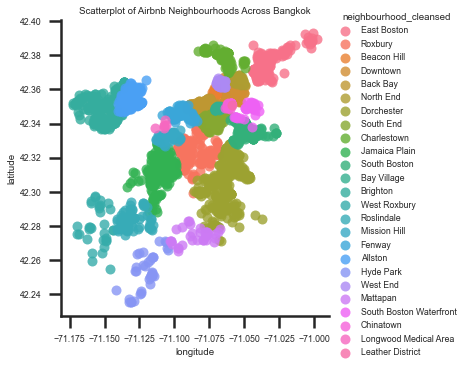

In [233]:

# Set style of scatterplot
sns.set_context("poster", font_scale=0.4)
sns.set_style("ticks")

# Create scatterplot of dataframe
sns.lmplot('longitude', # Horizontal axis
           'latitude', # Vertical axis
           data=df, # Data source
           fit_reg=False, # Don't fix a regression line
           hue="neighbourhood_cleansed", # Set color
           scatter_kws={"marker": "D", # Set marker style
                        "s": 100}) # S marker size

# Set title
plt.title('Scatterplot of Airbnb Neighbourhoods Across Boston')

# Set x-axis label
plt.xlabel('longitude')

# Set y-axis label
plt.ylabel('latitude')

C:\Users\Phongsapon\Anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(28.90644302777777, 0.5, 'latitude')

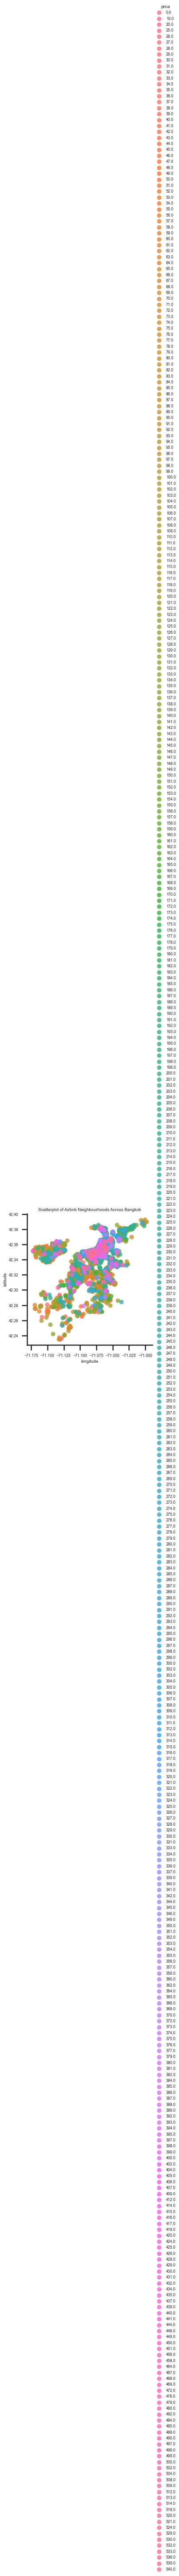

In [204]:


# Set style of scatterplot
sns.set_context("poster", font_scale=0.4)
sns.set_style("ticks")

# Create scatterplot of dataframe
sns.lmplot('longitude', # Horizontal axis
           'latitude', # Vertical axis
           data=df, # Data source
           fit_reg=False, # Don't fix a regression line
           hue="price", # Set color
           scatter_kws={"marker": "D", # Set marker style
                        "s": 100}) # S marker size

# Set title
plt.title('Scatterplot of Airbnb Neighbourhoods Across Boston')

# Set x-axis label
plt.xlabel('longitude')

# Set y-axis label
plt.ylabel('latitude')

<AxesSubplot:xlabel='latitude', ylabel='longitude'>

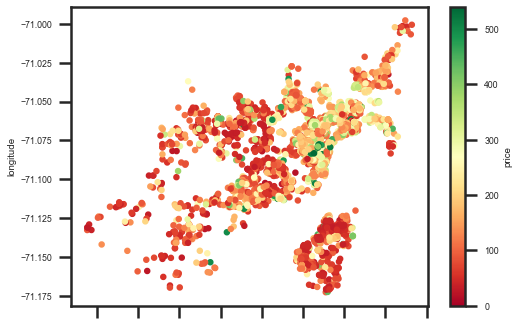

In [205]:
df.plot.scatter('latitude', 'longitude', c='price', colormap='RdYlGn')


According to the data, we can say that the price of Airbnb in some parts of Boston seems to be higher than others located around [-71.075,42.35] (Around Back Bay, Downtown) for longitude and latitude. I will not modify anything for these features, original columns will be put in our model.

#### Creating Dummy Encoding

In [234]:
list(df.columns[df.dtypes=='object'])

['host_response_time', 'neighbourhood_cleansed', 'property_type', 'room_type']

In [235]:
df[['host_response_time', 'neighbourhood_cleansed', 'property_type','room_type']]

host_response_time neighbourhood_cleansed                property_type  \
0         within an hour            East Boston           Entire rental unit   
1         within an hour                Roxbury           Entire guest suite   
2         within an hour                Roxbury   Entire condominium (condo)   
3     within a few hours            Beacon Hill           Entire rental unit   
4     within a few hours               Downtown           Entire rental unit   
...                  ...                    ...                          ...   
3244      within an hour           South Boston   Entire condominium (condo)   
3245      within an hour               Downtown           Entire rental unit   
3246      within an hour               Brighton  Private room in rental unit   
3247      within an hour               Downtown  Private room in rental unit   
3248      within an hour                Allston  Private room in rental unit   

            room_type  
0     Entire home/apt  
1     Entire home/apt  
2     Entire home/apt  
3     Entire home/apt  
4     Entire home/apt  
...               ...  
3244  Entire home/apt  
3245  Entire home/apt  
3246     Private room  
3247     Private room  
3248     Private room  

[3144 rows x 4 columns]

In [236]:
df_dummy = pd.get_dummies(df[list(df.columns[df.dtypes=='object'])])

In [237]:
df = df.join(df_dummy)

In [238]:
df.head()

id  host_response_time  host_response_rate  host_acceptance_rate  \
0   3781      within an hour               100.0                 100.0   
1   5506      within an hour               100.0                  97.0   
2   6695      within an hour               100.0                  97.0   
3   8789  within a few hours               100.0                  59.0   
4  10730  within a few hours               100.0                  59.0   

   host_is_superhost  host_total_listings_count  host_identity_verified  \
0                  1                          5                       0   
1                  1                          4                       1   
2                  1                          4                       1   
3                  1                          8                       1   
4                  1                          8                       1   

  neighbourhood_cleansed  latitude  longitude               property_type  \
0            East Boston  42.36413  -71.02991          Entire rental unit   
1                Roxbury  42.32844  -71.09581          Entire guest suite   
2                Roxbury  42.32802  -71.09387  Entire condominium (condo)   
3            Beacon Hill  42.35867  -71.06307          Entire rental unit   
4               Downtown  42.35906  -71.06271          Entire rental unit   

         room_type  accommodates  bathrooms  bedrooms  beds  price  \
0  Entire home/apt             2        1.0       1.0   0.0  125.0   
1  Entire home/apt             2        1.0       1.0   1.0  124.0   
2  Entire home/apt             4        1.0       1.0   0.0  164.0   
3  Entire home/apt             2        1.0       1.0   1.0  110.0   
4  Entire home/apt             2        1.0       1.0   1.0  100.0   

   minimum_nights  maximum_nights  minimum_minimum_nights  \
0              32            1125                    32.0   
1               3              90                     3.0   
2               3             730                     2.0   
3              91             365                    91.0   
4              91             365                    91.0   

   maximum_minimum_nights  minimum_maximum_nights  maximum_maximum_nights  \
0                    32.0                  1125.0                  1125.0   
1                     3.0                  1125.0                  1125.0   
2                     3.0                   730.0                   730.0   
3                    91.0                   365.0                   365.0   
4                    91.0                   365.0                   365.0   

   minimum_nights_avg_ntm  maximum_nights_avg_ntm  has_availability  \
0                    32.0                  1125.0                 1   
1                     3.0                  1125.0                 1   
2                     3.0                   730.0                 1   
3                    91.0                   365.0                 1   
4                    91.0                   365.0                 1   

   availability_30  availability_60  availability_90  availability_365  \
0                5                5                5                82   
1                7               37               51                51   
2               10               33               47                47   
3                5               35               65               340   
4                0                2               32               307   

   number_of_reviews  number_of_reviews_l30d  review_scores_rating  \
0                 21                       0                  4.95   
1                109                       1                  4.78   
2                116                       1                  4.80   
3                 25                       0                  4.64   
4                 32                       0                  4.78   

   review_scores_accuracy  review_scores_cleanliness  review_scores_checkin  \
0                    5.0

In [239]:
df = df.drop(['id','host_response_time', 'neighbourhood_cleansed', 'property_type','room_type'], axis=1)

In [242]:
df

host_response_rate  host_acceptance_rate  host_is_superhost  \
0                  100.0                 100.0                  1   
1                  100.0                  97.0                  1   
2                  100.0                  97.0                  1   
3                  100.0                  59.0                  1   
4                  100.0                  59.0                  1   
...                  ...                   ...                ...   
3244               100.0                 100.0                  1   
3245                98.0                  98.0                  1   
3246               100.0                 100.0                  1   
3247               100.0                 100.0                  1   
3248               100.0                 100.0                  1   

      host_total_listings_count  host_identity_verified   latitude  longitude  \
0                             5                       0  42.364130 -71.029910   
1                             4                       1  42.328440 -71.095810   
2                             4                       1  42.328020 -71.093870   
3                             8                       1  42.358670 -71.063070   
4                             8                       1  42.359060 -71.062710   
...                         ...                     ...        ...        ...   
3244                          0                       1  42.333945 -71.048292   
3245                         43                       1  42.357621 -71.061692   
3246                          1                       1  42.354557 -71.144149   
3247                          1                       1  42.359005 -71.058203   
3248                          1                       1  42.356447 -71.132326   

      accommodates  bathrooms  bedrooms  beds  price  minimum_nights  \
0                2        1.0       1.0   0.0  125.0              32   
1                2        1.0       1.0   1.0  124.0               3   
2                4        1.0       1.0   0.0  164.0               3   
3                2        1.0       1.0   1.0  110.0              91   
4                2        1.0       1.0   1.0  100.0              91   
...            ...        ...       ...   ...    ...             ...   
3244             4        2.0       2.0   2.0  220.0               3   
3245             2        1.0       1.0   1.0  211.0               2   
3246             1        1.0       1.0   1.0   55.0              91   
3247             1        2.0       1.0   1.0   55.0              91   
3248             1        2.0       1.0   1.0   54.0              91   

      maximum_nights  minimum_minimum_nights  maximum_minimum_nights  \
0               1125                    32.0                    32.0   
1                 90                     3.0                     3.0   
2                730                     2.0                     3.0   
3                365                    91.0                    91.0   
4                365                    91.0                    91.0   
...              ...                     ...                     ...   
3244             365                     3.0                     3.0   
3245            1125                     2.0                     2.0   
3246             365                    91.0                    91.0   
3247             365                    91.0                    91.0   
3248             365                    91.0                    91.0   

      minimum_maximum_nights  maximum_maximum_nights  minimum_nights_avg_ntm  \
0                     1125.0                  1125.0                    32.0   
1                     1125.0                  1125.0                     3.0   
2                      730.0                   730.0                     3.0   
3                      365.0                   365.0                    91.0   
4                      365.0                   365.0                    91

In [243]:
df.isnull().sum()

host_response_rate                        0
host_acceptance_rate                      0
host_is_superhost                         0
host_total_listings_count                 0
host_identity_verified                    0
                                         ..
property_type_Shared room in townhouse    0
room_type_Entire home/apt                 0
room_type_Hotel room                      0
room_type_Private room                    0
room_type_Shared room                     0
Length: 123, dtype: int64

In [244]:
dummy_col = list(df.dtypes[df.dtypes=='uint8'].index) 
numerical_col = [i for i in df.columns if i not in dummy_col]

In [245]:
from IPython.display import display
pd.options.display.max_columns = None
df

host_response_rate  host_acceptance_rate  host_is_superhost  \
0                  100.0                 100.0                  1   
1                  100.0                  97.0                  1   
2                  100.0                  97.0                  1   
3                  100.0                  59.0                  1   
4                  100.0                  59.0                  1   
...                  ...                   ...                ...   
3244               100.0                 100.0                  1   
3245                98.0                  98.0                  1   
3246               100.0                 100.0                  1   
3247               100.0                 100.0                  1   
3248               100.0                 100.0                  1   

      host_total_listings_count  host_identity_verified   latitude  longitude  \
0                             5                       0  42.364130 -71.029910   
1                             4                       1  42.328440 -71.095810   
2                             4                       1  42.328020 -71.093870   
3                             8                       1  42.358670 -71.063070   
4                             8                       1  42.359060 -71.062710   
...                         ...                     ...        ...        ...   
3244                          0                       1  42.333945 -71.048292   
3245                         43                       1  42.357621 -71.061692   
3246                          1                       1  42.354557 -71.144149   
3247                          1                       1  42.359005 -71.058203   
3248                          1                       1  42.356447 -71.132326   

      accommodates  bathrooms  bedrooms  beds  price  minimum_nights  \
0                2        1.0       1.0   0.0  125.0              32   
1                2        1.0       1.0   1.0  124.0               3   
2                4        1.0       1.0   0.0  164.0               3   
3                2        1.0       1.0   1.0  110.0              91   
4                2        1.0       1.0   1.0  100.0              91   
...            ...        ...       ...   ...    ...             ...   
3244             4        2.0       2.0   2.0  220.0               3   
3245             2        1.0       1.0   1.0  211.0               2   
3246             1        1.0       1.0   1.0   55.0              91   
3247             1        2.0       1.0   1.0   55.0              91   
3248             1        2.0       1.0   1.0   54.0              91   

      maximum_nights  minimum_minimum_nights  maximum_minimum_nights  \
0               1125                    32.0                    32.0   
1                 90                     3.0                     3.0   
2                730                     2.0                     3.0   
3                365                    91.0                    91.0   
4                365                    91.0                    91.0   
...              ...                     ...                     ...   
3244             365                     3.0                     3.0   
3245            1125                     2.0                     2.0   
3246             365                    91.0                    91.0   
3247             365                    91.0                    91.0   
3248             365                    91.0                    91.0   

      minimum_maximum_nights  maximum_maximum_nights  minimum_nights_avg_ntm  \
0                     1125.0                  1125.0                    32.0   
1                     1125.0                  1125.0                     3.0   
2                      730.0                   730.0                     3.0   
3                      365.0                   365.0                    91.0   
4                      365.0                   365.0                    91

## 3. Building Prediction Model

In this section multiple machine learning models will be built in order to predict Boston Airbnb price

In [264]:
# Separating X and y
x = df.drop('price', axis=1)
y = df.price

# Splitting into train and test sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=12)

In [265]:
dummy_col = list(df.dtypes[df.dtypes=='uint8'].index) 
numerical_col = [i for i in df.columns if i not in dummy_col]
numerical_col_index = [list(x_train.columns).index(i) for i in numerical_col if i != 'price']
dummy_col_index = [list(x_train.columns).index(i) for i in dummy_col]

In [266]:
import numpy as np
import statsmodels.api as sm

# adding the constant term
x_train = sm.add_constant(x_train)
  
# performing the regression
# and fitting the model
result = sm.OLS(y_train, x_train).fit()
  
# printing the summary table
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.709
Model:                            OLS   Adj. R-squared:                  0.695
Method:                 Least Squares   F-statistic:                     52.15
Date:                Wed, 01 Dec 2021   Prob (F-statistic):               0.00
Time:                        02:21:07   Log-Likelihood:                -13831.
No. Observations:                2515   AIC:                         2.789e+04
Df Residuals:                    2402   BIC:                         2.855e+04
Df Model:                         112                                         
Covariance Type:            nonrobust                                         
                                                        coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------

C:\Users\Phongsapon\Anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [267]:
import numpy as np
import statsmodels.api as sm

# adding the constant term
x_test = sm.add_constant(x_test)
  
# performing the regression
# and fitting the model
result = sm.OLS(y_test, x_test).fit()
  
# printing the summary table
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.787
Model:                            OLS   Adj. R-squared:                  0.746
Method:                 Least Squares   F-statistic:                     19.47
Date:                Wed, 01 Dec 2021   Prob (F-statistic):          3.52e-125
Time:                        02:21:40   Log-Likelihood:                -3325.6
No. Observations:                 629   AIC:                             6853.
Df Residuals:                     528   BIC:                             7302.
Df Model:                         100                                         
Covariance Type:            nonrobust                                         
                                                        coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------

C:\Users\Phongsapon\Anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


###  3.1 Model 1: Ridge Regression

In order to provide a baseline level for the model, I will a Ridge Regression to predict the listing prices.

Ridge takes a step further and penalizes the model for the sum of squared value of the weights. Thus, the weights not only tend to have smaller absolute values, but also really tend to penalize the extremes of the weights, resulting in a group of weights that are more evenly distributed.

In [270]:
# Separating X and y
x = df.drop('price', axis=1)
y = df.price

# Splitting into train and test sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=12)

In [271]:
from sklearn.preprocessing import StandardScaler,FunctionTransformer
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline,FeatureUnion
from sklearn.linear_model import LassoCV, ElasticNetCV, RidgeCV

pipeline=Pipeline(steps = [
    ('imputer',SimpleImputer(strategy = 'most_frequent')),
    ('feature_processing', FeatureUnion(transformer_list = [
            ('categorical', FunctionTransformer(lambda data: data[:,dummy_col_index])),

            #only impute and standardize numeric data
            ('numeric', Pipeline(steps = [
                ('select', FunctionTransformer(lambda data: data[:,numerical_col_index])),
                ('scaler', StandardScaler())
                        ]))
        ])),
    ('model', RidgeCV(cv=10))
    ]
)

In [272]:
pipeline.fit(x_train, y_train)

Pipeline(steps=[('imputer', SimpleImputer(strategy='most_frequent')),
                ('feature_processing',
                 FeatureUnion(transformer_list=[('categorical',
                                                 FunctionTransformer(func=<function <lambda> at 0x0000015B9C0822F0>)),
                                                ('numeric',
                                                 Pipeline(steps=[('select',
                                                                  FunctionTransformer(func=<function <lambda> at 0x0000015B9C082378>)),
                                                                 ('scaler',
                                                                  StandardScaler())]))])),
                ('model', RidgeCV(alphas=array([ 0.1,  1. , 10. ]), cv=10))])

In [273]:
print('training r2 score: {}'.format(pipeline.score(x_train, y_train)))
y_pred_ridge = pipeline.predict(x_test)
print('test r2 score: {}'.format(pipeline.score(x_test, y_test)))

training r2 score: 0.7068398419310653
test r2 score: 0.7233406275966097


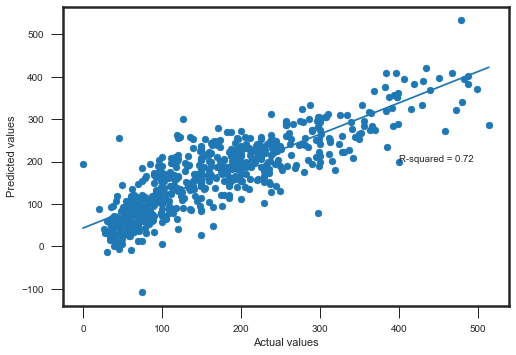

In [344]:
y_pred_out = y_pred_ridge

r_squared = (r2_score(y_test, y_pred_out))
plt.scatter(y_test,y_pred_out)
plt.xlabel('Actual values')
plt.ylabel('Predicted values')

plt.plot(np.unique(y_test), np.poly1d(np.polyfit(y_test,y_pred_out, 1))(np.unique(y_test)))

plt.text(400, 200 ,'R-squared = %0.2f' % r_squared)
plt.show()

<AxesSubplot:>

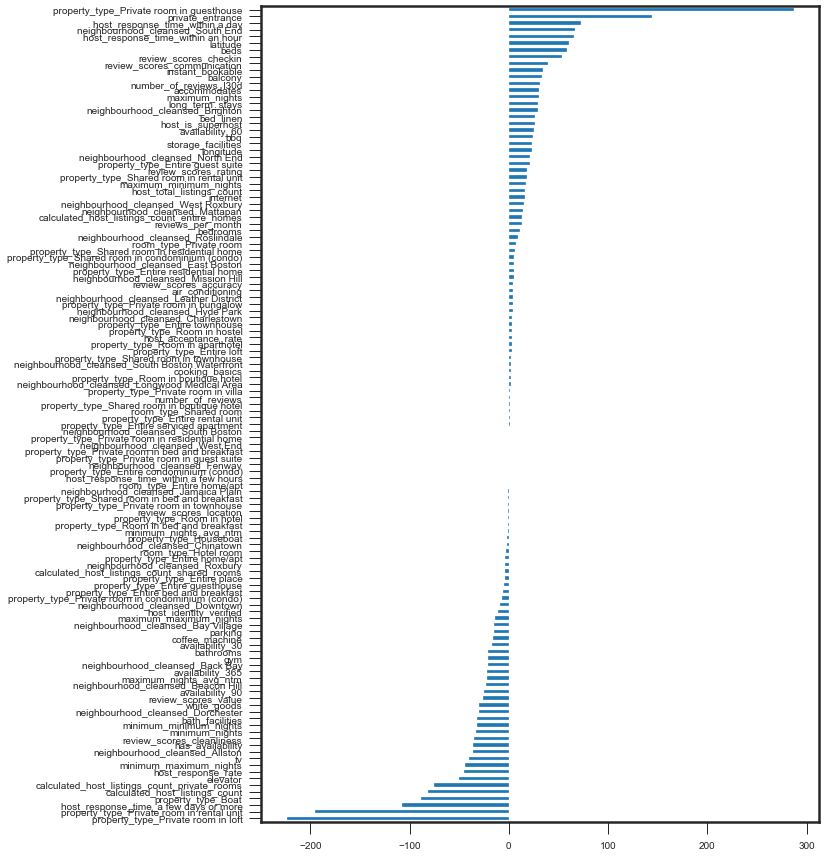

In [274]:
plt.figure(figsize=(10,15))
pd.Series(pipeline.named_steps['model'].coef_, index= x_train.columns).sort_values()[:].plot.barh()

###  3.2 Model 2: XGBoost

XGBoost is a tree based ensemble machine learning algorithm which has higher predicting power and performance and it is achieved by improvisation on Gradient Boosting framework by introducing some accurate approximation algorithms. XGB commonly used and frequently makes its way to the top of the leaderboard of competitions in data science.

In [321]:
import time
import xgboost as xgb
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

In [332]:
import xgboost as xgb
model_xgb = xgb.XGBRegressor(seed=42,random_state =12)
pipeline2 = Pipeline(steps = [
    ('imputer',SimpleImputer(strategy = 'median')),
    ('model', model_xgb)
    ]
)
pipeline2.fit(x_train, y_train)

Pipeline(steps=[('imputer', SimpleImputer(strategy='median')),
                ('model',
                 XGBRegressor(base_score=0.5, booster='gbtree',
                              colsample_bylevel=1, colsample_bynode=1,
                              colsample_bytree=1, enable_categorical=False,
                              gamma=0, gpu_id=-1, importance_type=None,
                              interaction_constraints='',
                              learning_rate=0.300000012, max_delta_step=0,
                              max_depth=6, min_child_weight=1, missing=nan,
                              monotone_constraints='()', n_estimators=100,
                              n_jobs=12, num_parallel_tree=1, predictor='auto',
                              random_state=12, reg_alpha=0, reg_lambda=1,
                              scale_pos_weight=1, seed=42, subsample=1,
                              tree_method='exact', validate_parameters=1,
                              verbosity=None

In [337]:
print('r2 for training set using XBG is {}'.format(pipeline2.score(x_train, (y_train))))
y_pred_xgb = pipeline2.predict(x_test)
#print('best parameters: {}'.format(cv.best_params_))
print('r2 for test set using XBG is {}'.format(pipeline2.score(x_test, (y_test))))

r2 for training set using XBG is 0.9930180976543316
r2 for test set using XBG is 0.8240568235393199


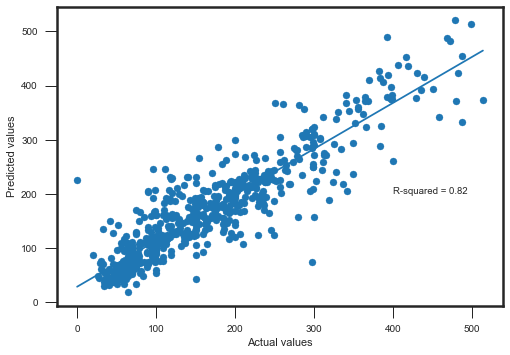

In [343]:
y_pred_out = y_pred_xgb

r_squared = (r2_score(y_test, y_pred_out))
plt.scatter(y_test,y_pred_out)
plt.xlabel('Actual values')
plt.ylabel('Predicted values')

plt.plot(np.unique(y_test), np.poly1d(np.polyfit(y_test,y_pred_out, 1))(np.unique(y_test)))

plt.text(400, 200 ,'R-squared = %0.2f' % r_squared)
plt.show()

In [285]:
ft_weights_xgb_reg = pd.DataFrame(pipeline2[1].feature_importances_, columns=['weight'], index=x_train.columns)
ft_weights_xgb_reg.sort_values('weight', inplace=True)
ft_weights_xgb_reg

weight
instant_bookable                                0.000000
has_availability                                0.000000
host_is_superhost                               0.000000
property_type_Shared room in boutique hotel     0.000000
property_type_Shared room in bed and breakfast  0.000000
...                                                  ...
gym                                             0.025301
bathrooms                                       0.027406
property_type_Room in hotel                     0.046417
room_type_Entire home/apt                       0.203267
room_type_Private room                          0.301317

[122 rows x 1 columns]

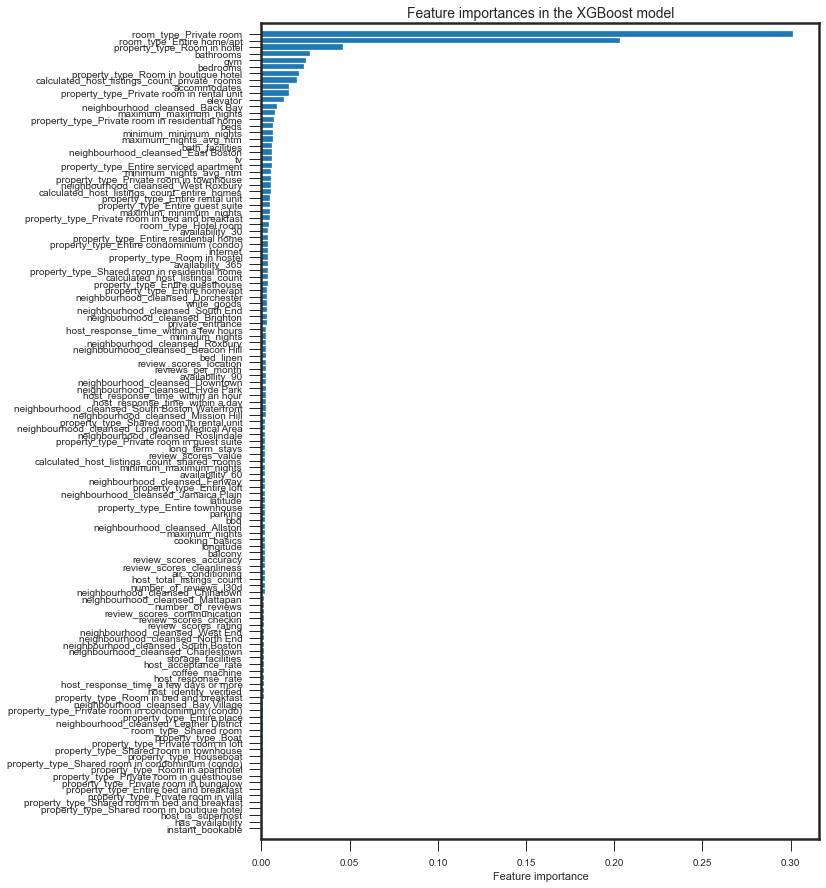

In [286]:
# Plotting feature importances
plt.figure(figsize=(10,15))
plt.barh(ft_weights_xgb_reg.index, ft_weights_xgb_reg.weight, align='center') 
plt.title("Feature importances in the XGBoost model", fontsize=14)
plt.xlabel("Feature importance")
plt.margins(y=0.01)
plt.show()

As we can see, more than 50 features have a feature importance of 0 in the model, so we will filter all of them out from input features.

In [310]:
# ft_weights_xgb_reg[abs(ft_weights_xgb_reg.weight) > 0.01 ]

In [296]:
###  3.3 Model 3: XGBoost (deleted feature)

In [304]:
# select_list = list(ft_weights_xgb_reg[abs(ft_weights_xgb_reg.weight) > 0.01 ].index)

In [305]:
# # Separating X and y
# X = df.drop(['price'], axis=1)
# X = X[select_list]
# y = df.price

# # Splitting into train and test sets
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=12)

In [308]:
# import xgboost as xgb
# model_xgb = xgb.XGBRegressor(n_estimators=500, colsample_bytree=0.4, 
#                              learning_rate=0.01, max_depth=12, 
#                              reg_alpha=0.05, 
#                              subsample=0.5, seed=42, 
#                              random_state =12)
# pipeline3 = Pipeline(steps = [
#     ('model', model_xgb)
#     ]
# )
# pipeline3.fit(x_train, y_train)

In [309]:
# print('r2 for training set using XGB (deleted features) is {}'.format(pipeline3.score(x_train, (y_train))))
# #best_model = cv.best_estimator_
# y_pred_rf = pipeline3.predict(x_test)
# #print('best parameters: {}'.format(cv.best_params_))
# print('r2 for test set using XGB (deleted features) is {}'.format(pipeline3.score(x_test, (y_test))))

### Model Summary

In [352]:
print('r2 for training set using Ridge is {}'.format(pipeline.score(x_train, y_train)))
y_pred_ridge = pipeline.predict(x_test)
print('r2 for test set using Ridge is {}'.format(pipeline.score(x_test, y_test)))

r2 for training set using Ridge is 0.7068398419310653
r2 for test set using Ridge is 0.7233406275966097


In [353]:
print('r2 for training set using XBG is {}'.format(pipeline2.score(x_train, (y_train))))
#best_model = cv.best_estimator_
y_pred_xgb = pipeline2.predict(x_test)
#print('best parameters: {}'.format(cv.best_params_))
print('r2 for test set using XBG is {}'.format(pipeline2.score(x_test, (y_test))))

r2 for training set using XBG is 0.9930180976543316
r2 for test set using XBG is 0.8240568235393199


C:\Users\Phongsapon\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\Users\Phongsapon\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


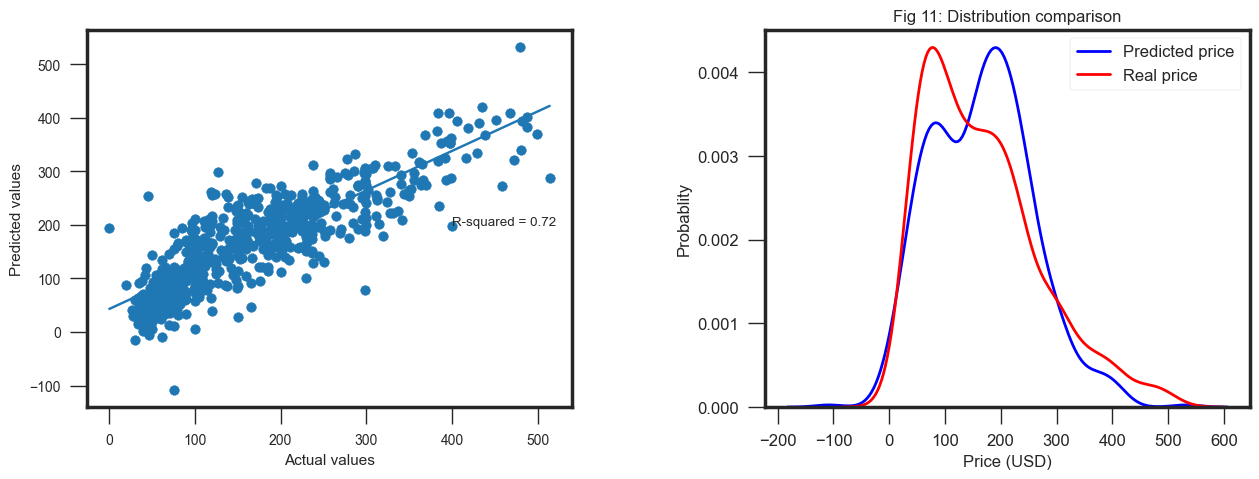

In [354]:
fig = plt.figure(figsize =(15, 5),dpi=100)
fig.subplots_adjust(hspace=0.4, wspace=0.4)
ax = plt.axes(aspect = 'equal')

plt.subplot(121)
y_pred_out = y_pred_ridge
r_squared = (r2_score(y_test, y_pred_out))
plt.scatter(y_test,y_pred_out)
plt.xlabel('Actual values')
plt.ylabel('Predicted values')
plt.plot(np.unique(y_test), np.poly1d(np.polyfit(y_test,y_pred_out, 1))(np.unique(y_test)))
plt.text(400, 200 ,'R-squared = %0.2f' % r_squared)


plt.subplot(122)
sns.distplot(y_pred_out, hist=False,
             kde_kws={'color': 'b', 'lw': 2, 'label': 'Predicted price'})
sns.distplot(y_test, hist=False,
             kde_kws={'color': 'r', 'lw': 2, 'label': 'Real price'})
plt.title('Distribution comparison', fontsize=12)
plt.ylabel('Probablity', fontsize=12)
plt.xlabel('Price (USD)', fontsize=12)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.legend(['Predicted price', 'Real price'], prop={"size":12})


plt.show()

C:\Users\Phongsapon\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\Users\Phongsapon\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


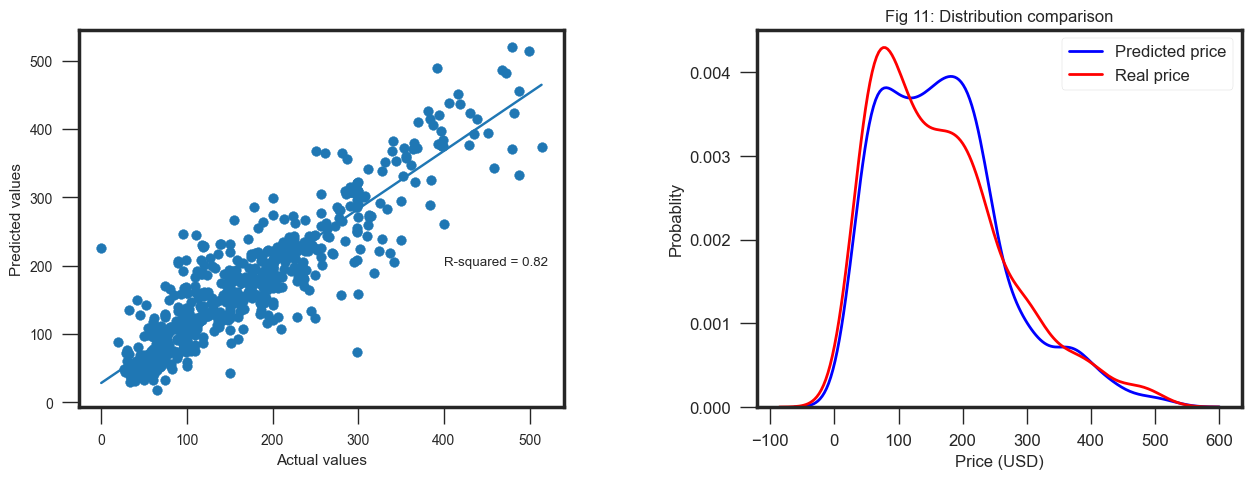

In [351]:
fig = plt.figure(figsize =(15, 5),dpi=100)
fig.subplots_adjust(hspace=0.4, wspace=0.4)
ax = plt.axes(aspect = 'equal')

plt.subplot(121)
y_pred_out = y_pred_xgb
r_squared = (r2_score(y_test, y_pred_out))
plt.scatter(y_test,y_pred_out)
plt.xlabel('Actual values')
plt.ylabel('Predicted values')
plt.plot(np.unique(y_test), np.poly1d(np.polyfit(y_test,y_pred_out, 1))(np.unique(y_test)))
plt.text(400, 200 ,'R-squared = %0.2f' % r_squared)


plt.subplot(122)
sns.distplot(y_pred_out, hist=False,
             kde_kws={'color': 'b', 'lw': 2, 'label': 'Predicted price'})
sns.distplot(y_test, hist=False,
             kde_kws={'color': 'r', 'lw': 2, 'label': 'Real price'})
plt.title('Distribution comparison', fontsize=12)
plt.ylabel('Probablity', fontsize=12)
plt.xlabel('Price (USD)', fontsize=12)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.legend(['Predicted price', 'Real price'], prop={"size":12})


plt.show()

We have achieved an R-squared of about 0.72 in Ridge Regression and 0.82 in the XGBoosting model. We could interpret the 10% difference in R-squared value that the XGBoost model performs better than the Ridge Regression model. According to the plot, the problem that causes the error of this model is that the data is too small (about 3000 data points), so this could lead to overfitting in the training set. Improvement could be done by getting more listing data from other similar cities to increase the datasets and the model performance.

In [199]:
# test how close the predicted prices are against true price
rand_id_1 = np.random.choice(y_test.index, 1)[0]
print('Price of listing id {} is {}, the predicted price is {}'.format(listings.loc[rand_id_1].id, y_test.loc[rand_id_1], round(y_pred_xgb[np.argwhere(y_test.index== rand_id_1)[0][0]],2) ))

rand_id_2 = np.random.choice(y_test.index, 1)[0]
print('Price of listing id {} is {}, the predicted price is {}'.format(listings.loc[rand_id_2].id, y_test.loc[rand_id_2], round(y_pred_xgb[np.argwhere(y_test.index== rand_id_2)[0][0]],2) ))


Price of listing id 4577188 is 179.0, the predicted price is 196.69000244140625
Price of listing id 15405175 is 155.0, the predicted price is 163.55999755859375


# 4. Project Summary

To summarize up the project, Let's get back to answer the goal of this project.

In the first question, "How to create Boston's Airbnb Price prediction model?"
as we can see our step to create prediction model is to divide our workflow into mainly 3 section:
    
    - 1) Data Exploration 
        -> In this step, we start to explore the dataset and visualize some of the crucial features to make us understand on how some features interact to others.
        
    - 2) Data Pre-Processing 
        -> From data exploration, there are some format and type of the dataset that we need to do some cleansing and imputing step.
        
    - 3) Building Prediction Model 
        -> Building Machine Learning Model with sklean module, I've implemented 2 types of ML which is Ridge Regression and XGBoosting model
        

In the second question, "What features highly influence the price of Airbnb?"
From the analysis, we can clearly see that some features dominate others like 

- room_type_Private room
- room_type_Entire home/apt
- property_type_Room in hotel
- bathrooms
- gym



# 5. Future Work

To improve the model performance, we could
- Getting more listing data from other similar cities to reduce the overfitting
- Try other model such as random forest or deep learning to improve the accuracy
- Clustering technique to get more insightful information from the data.
- Deploy Machine Learning model to web.